In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
cd 'drive/MyDrive/ML_HW_3'

/content/drive/MyDrive/ML_HW_3


In [ ]:
pwd

'/content/drive/MyDrive/ML_HW_3'

------------------------------------------------------------------------------
Problem 1

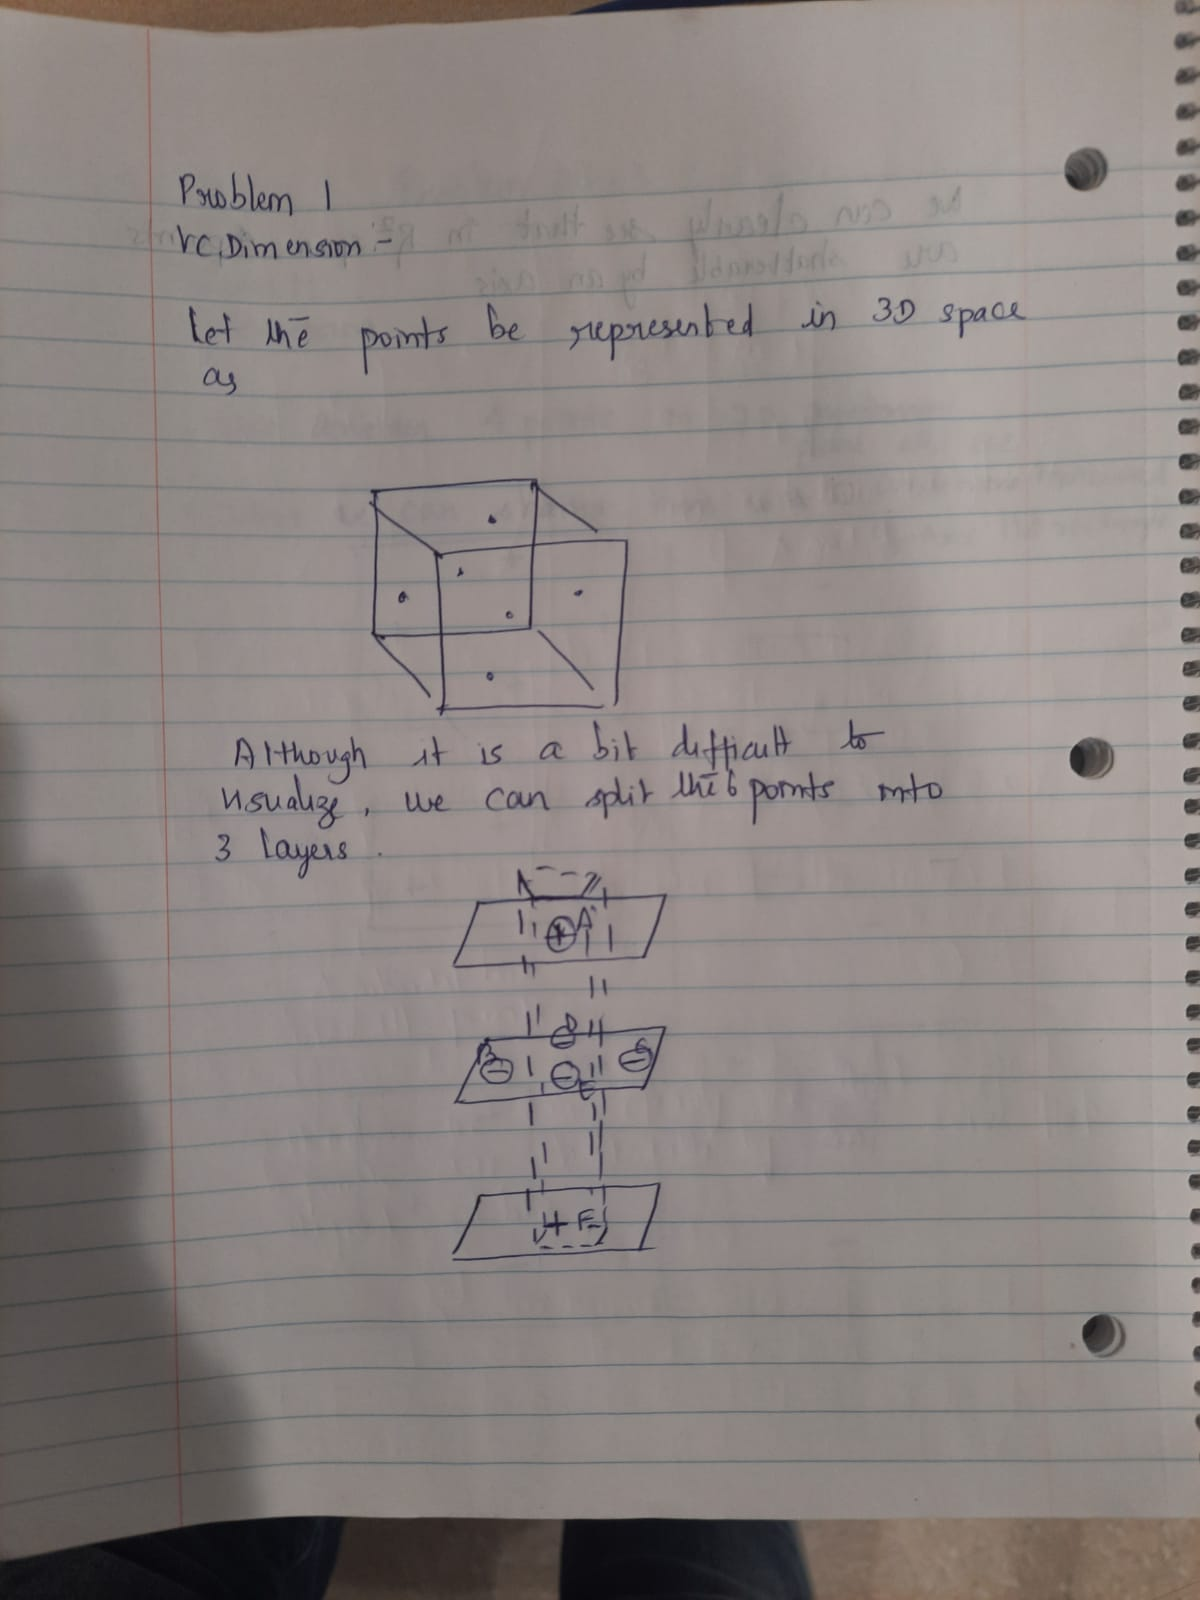

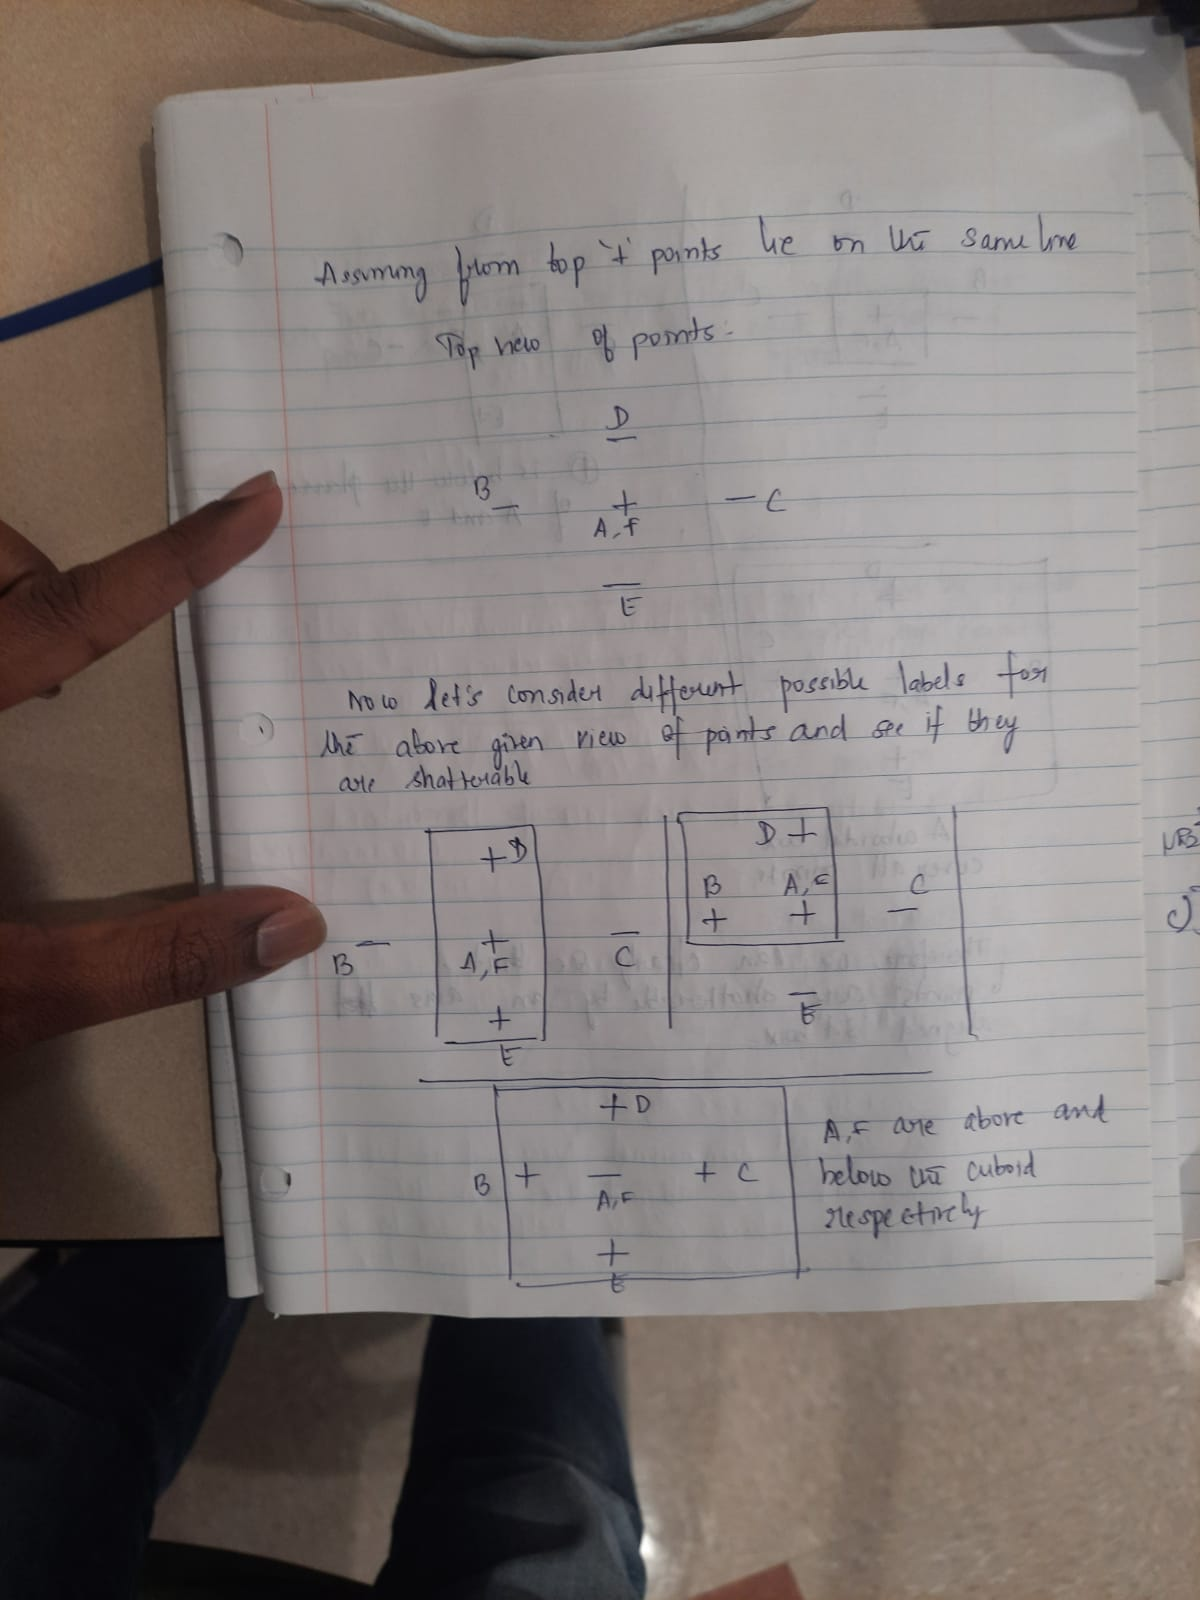

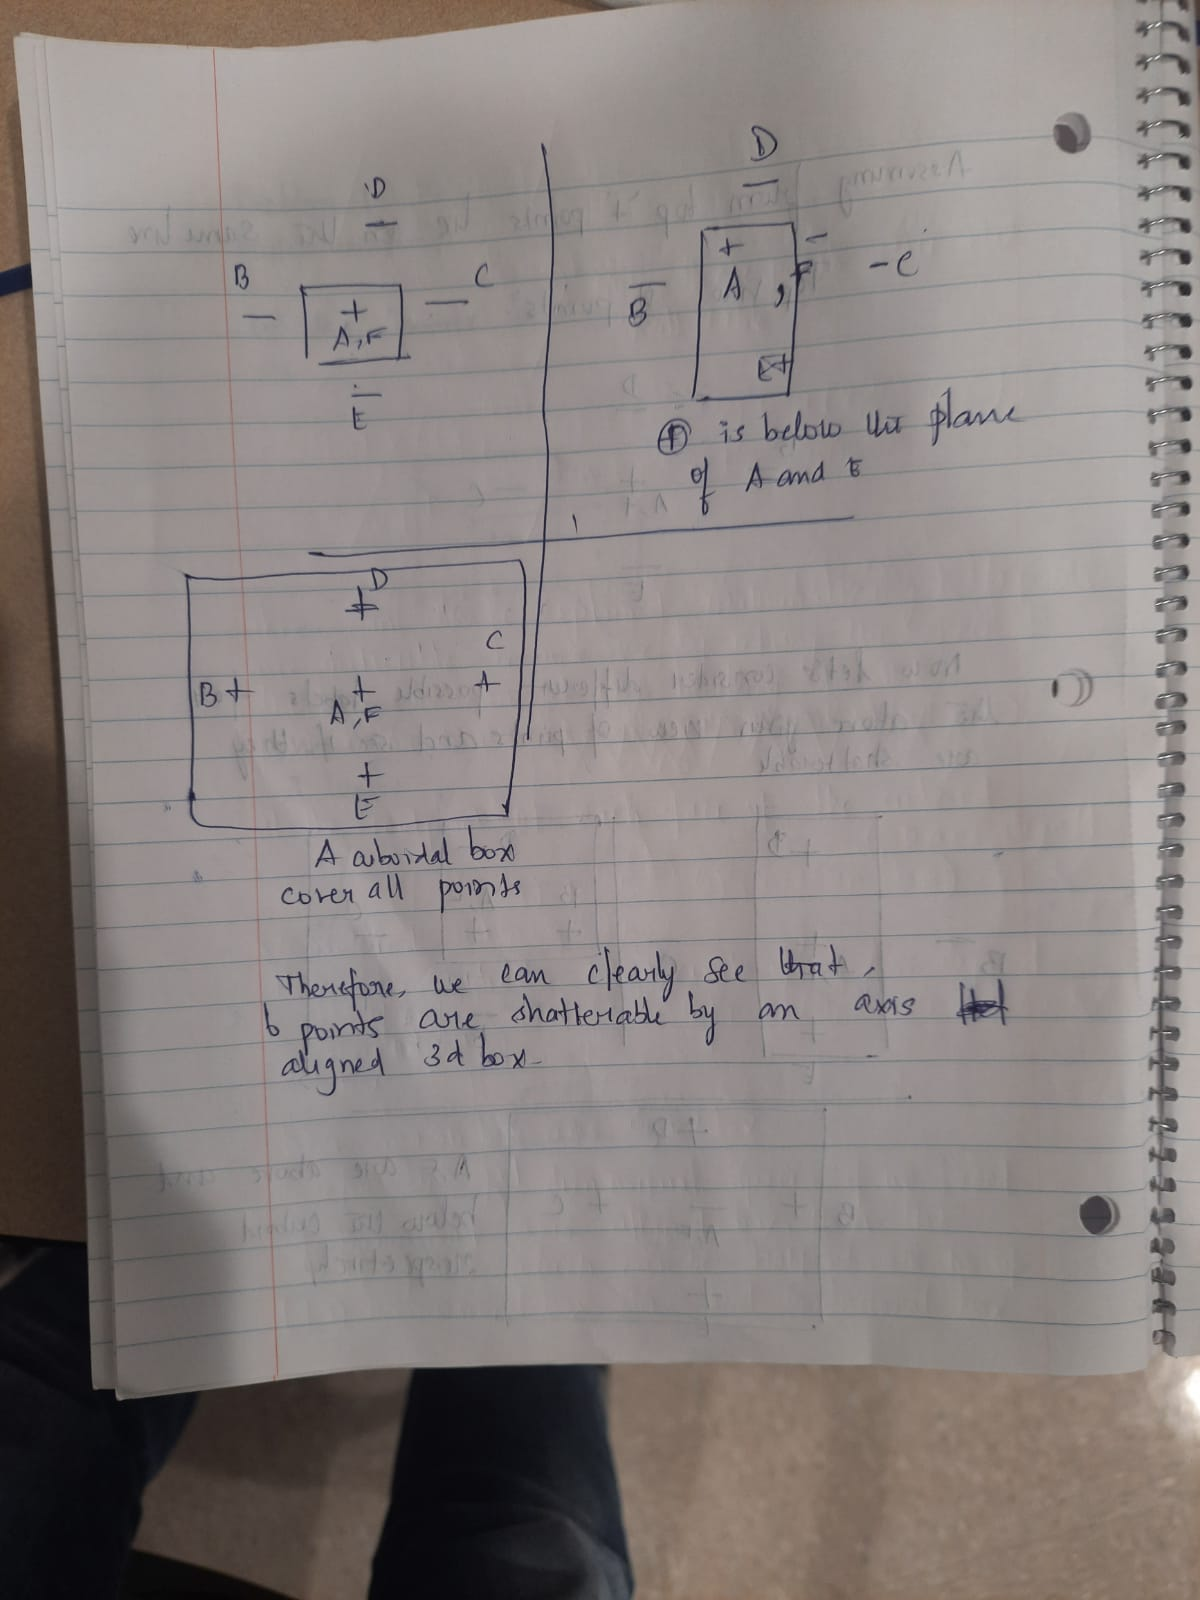

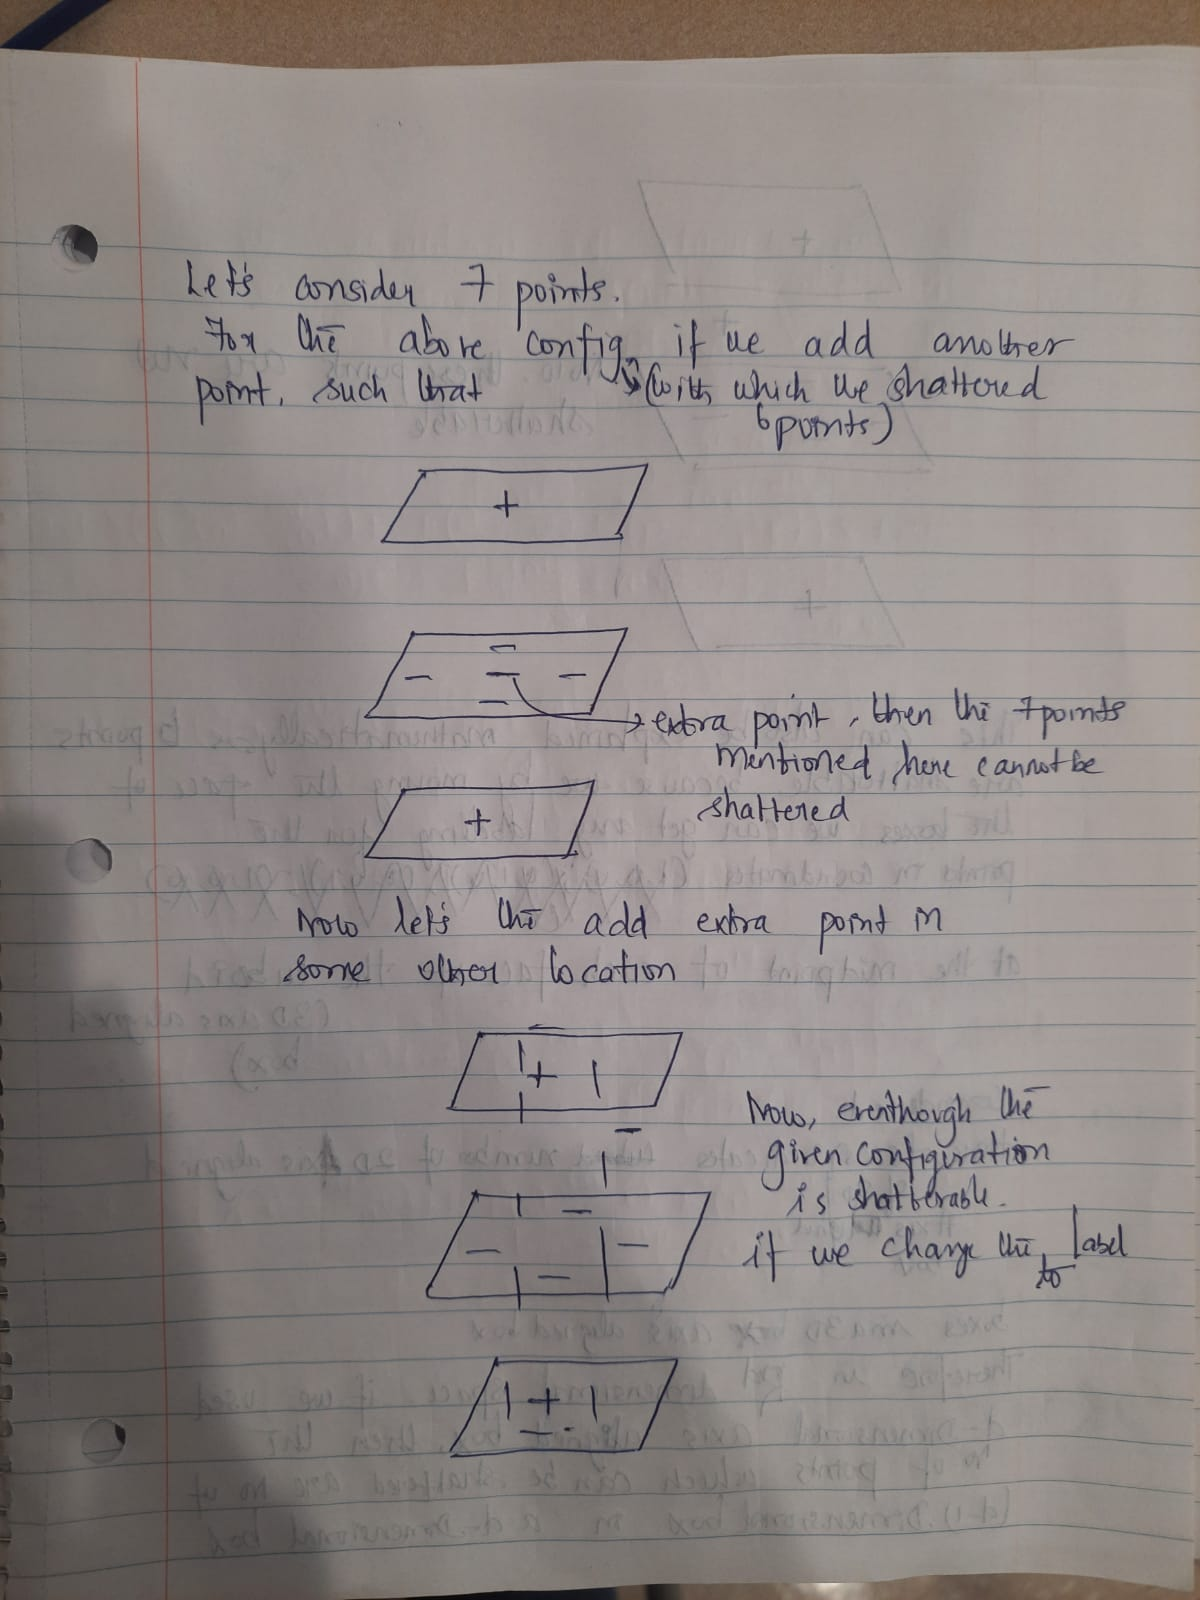

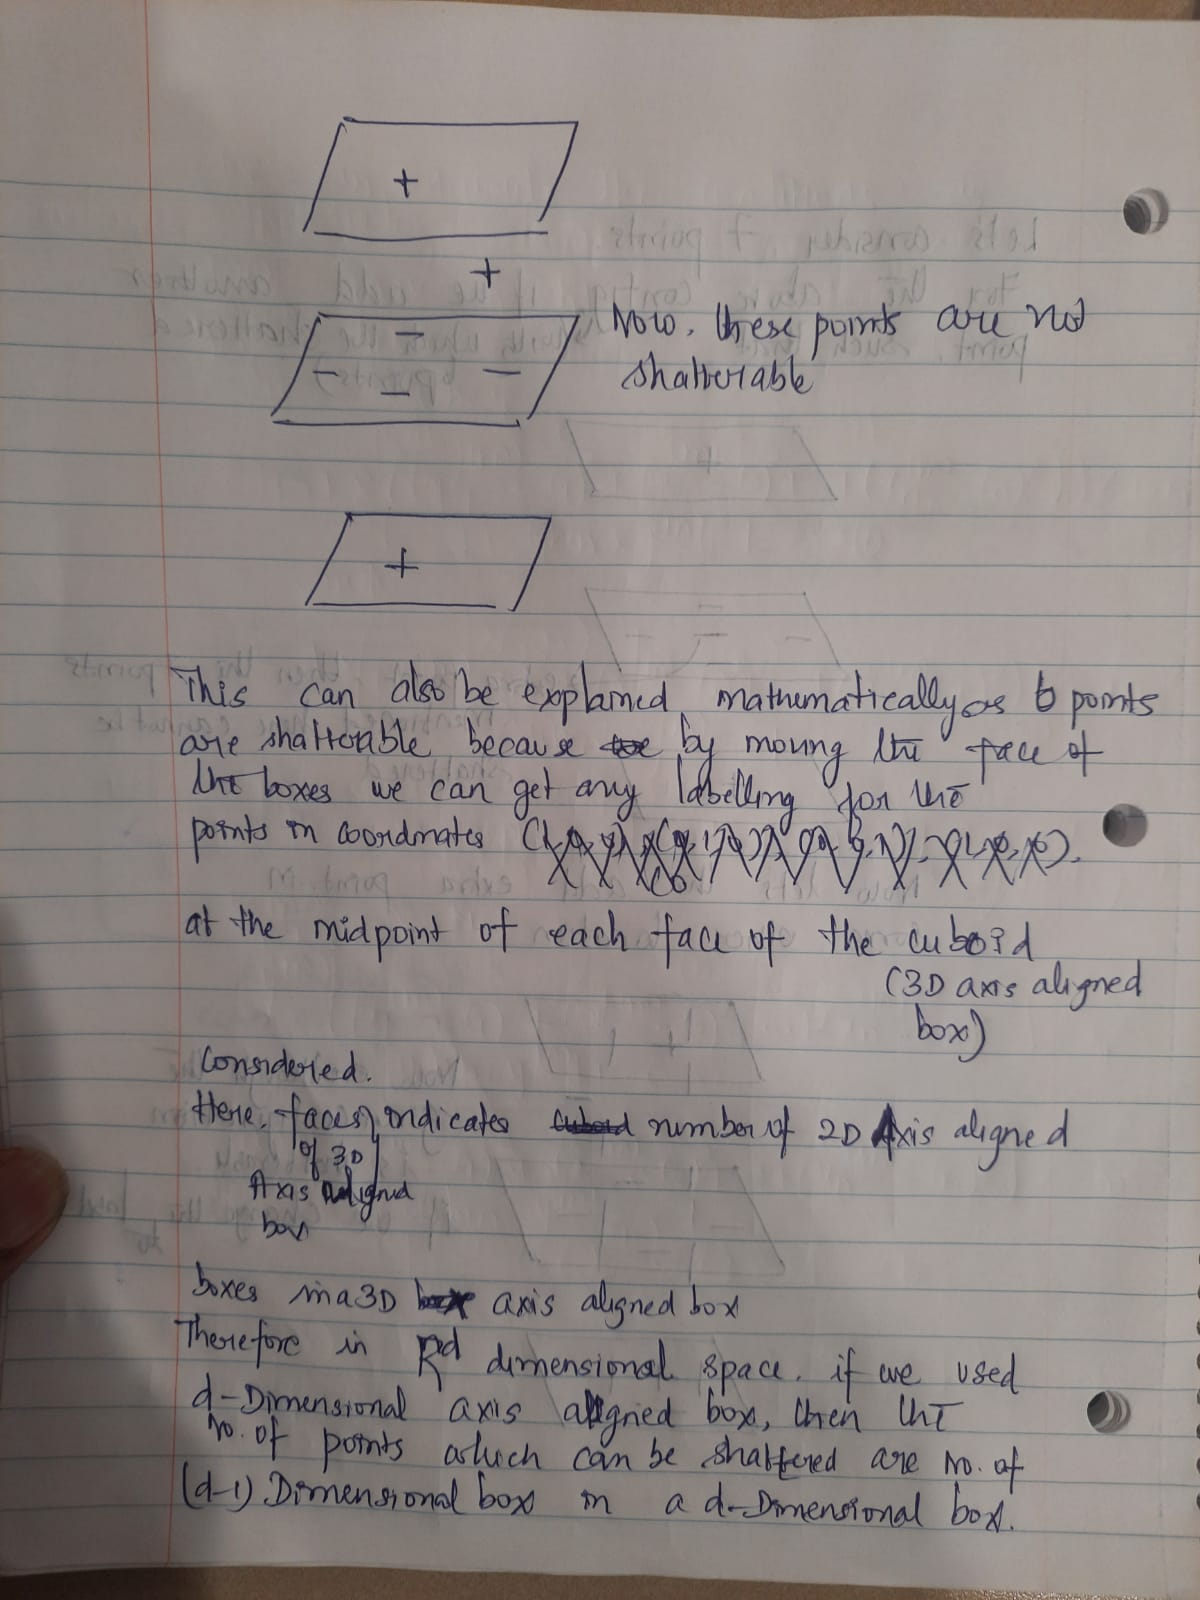

------------------------------------------------------------------------------
Problem 2

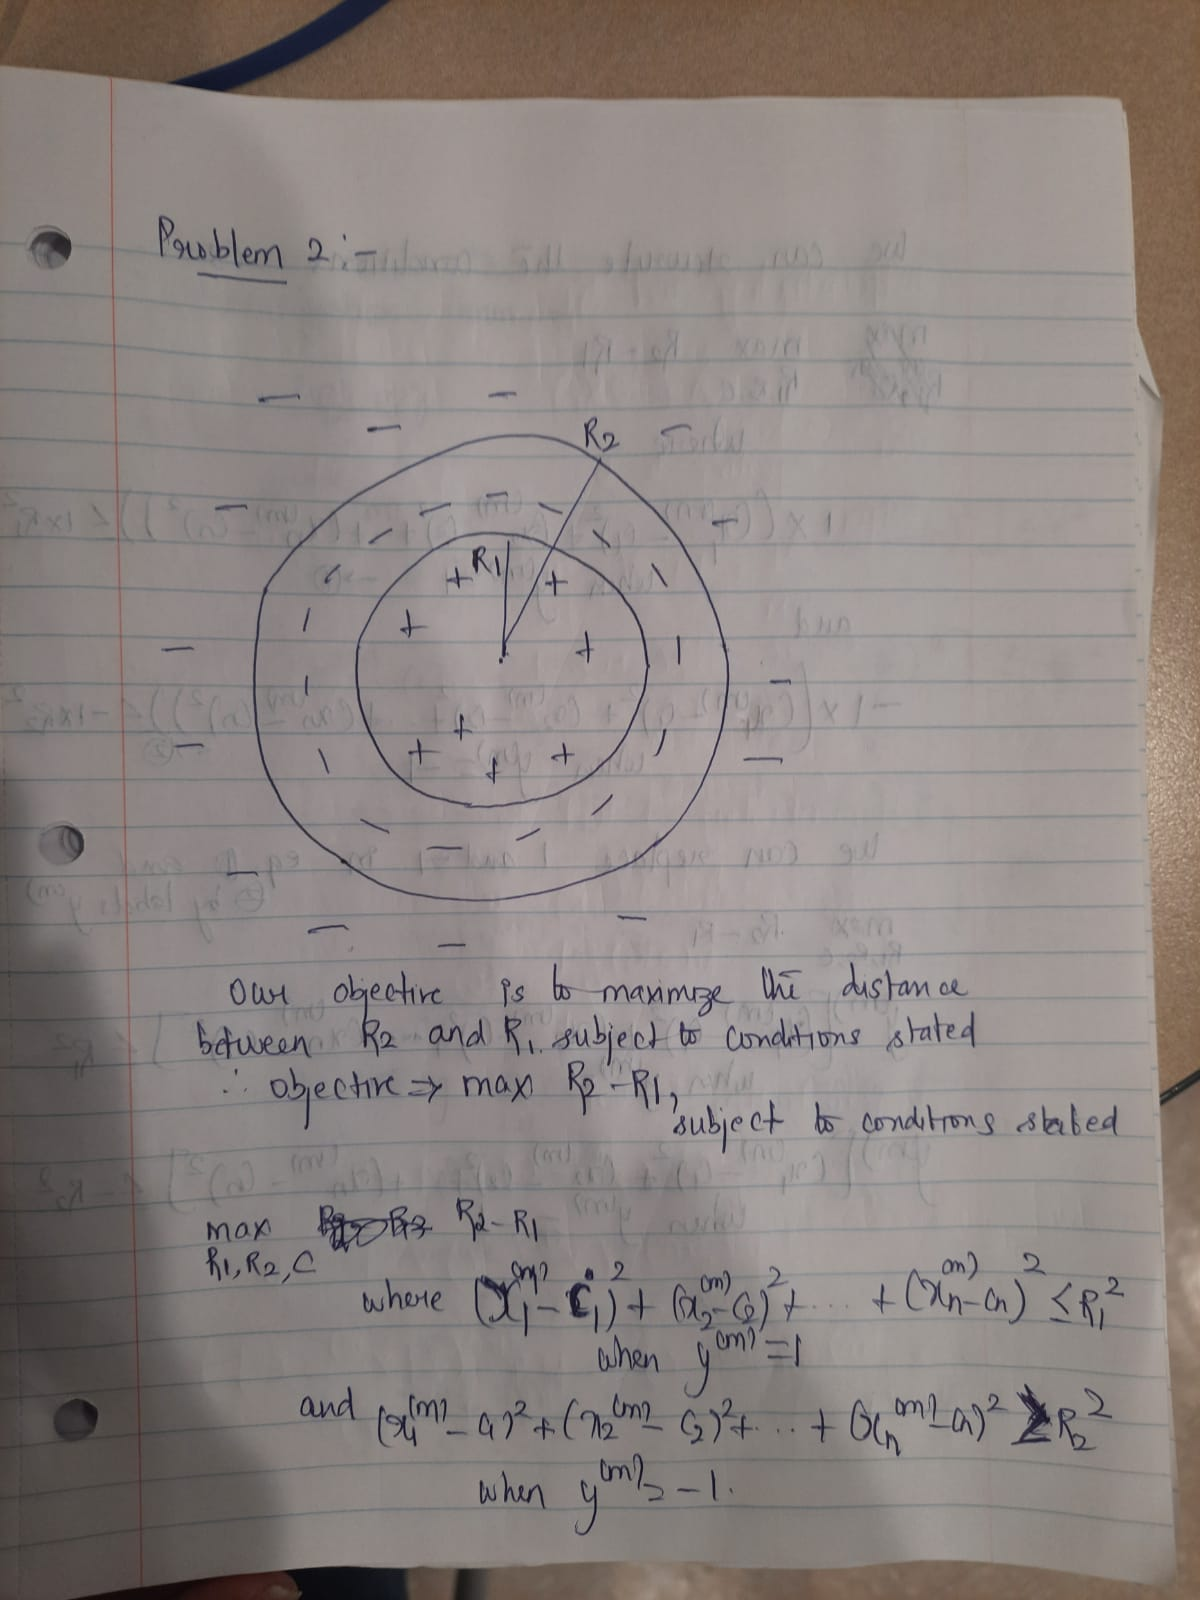

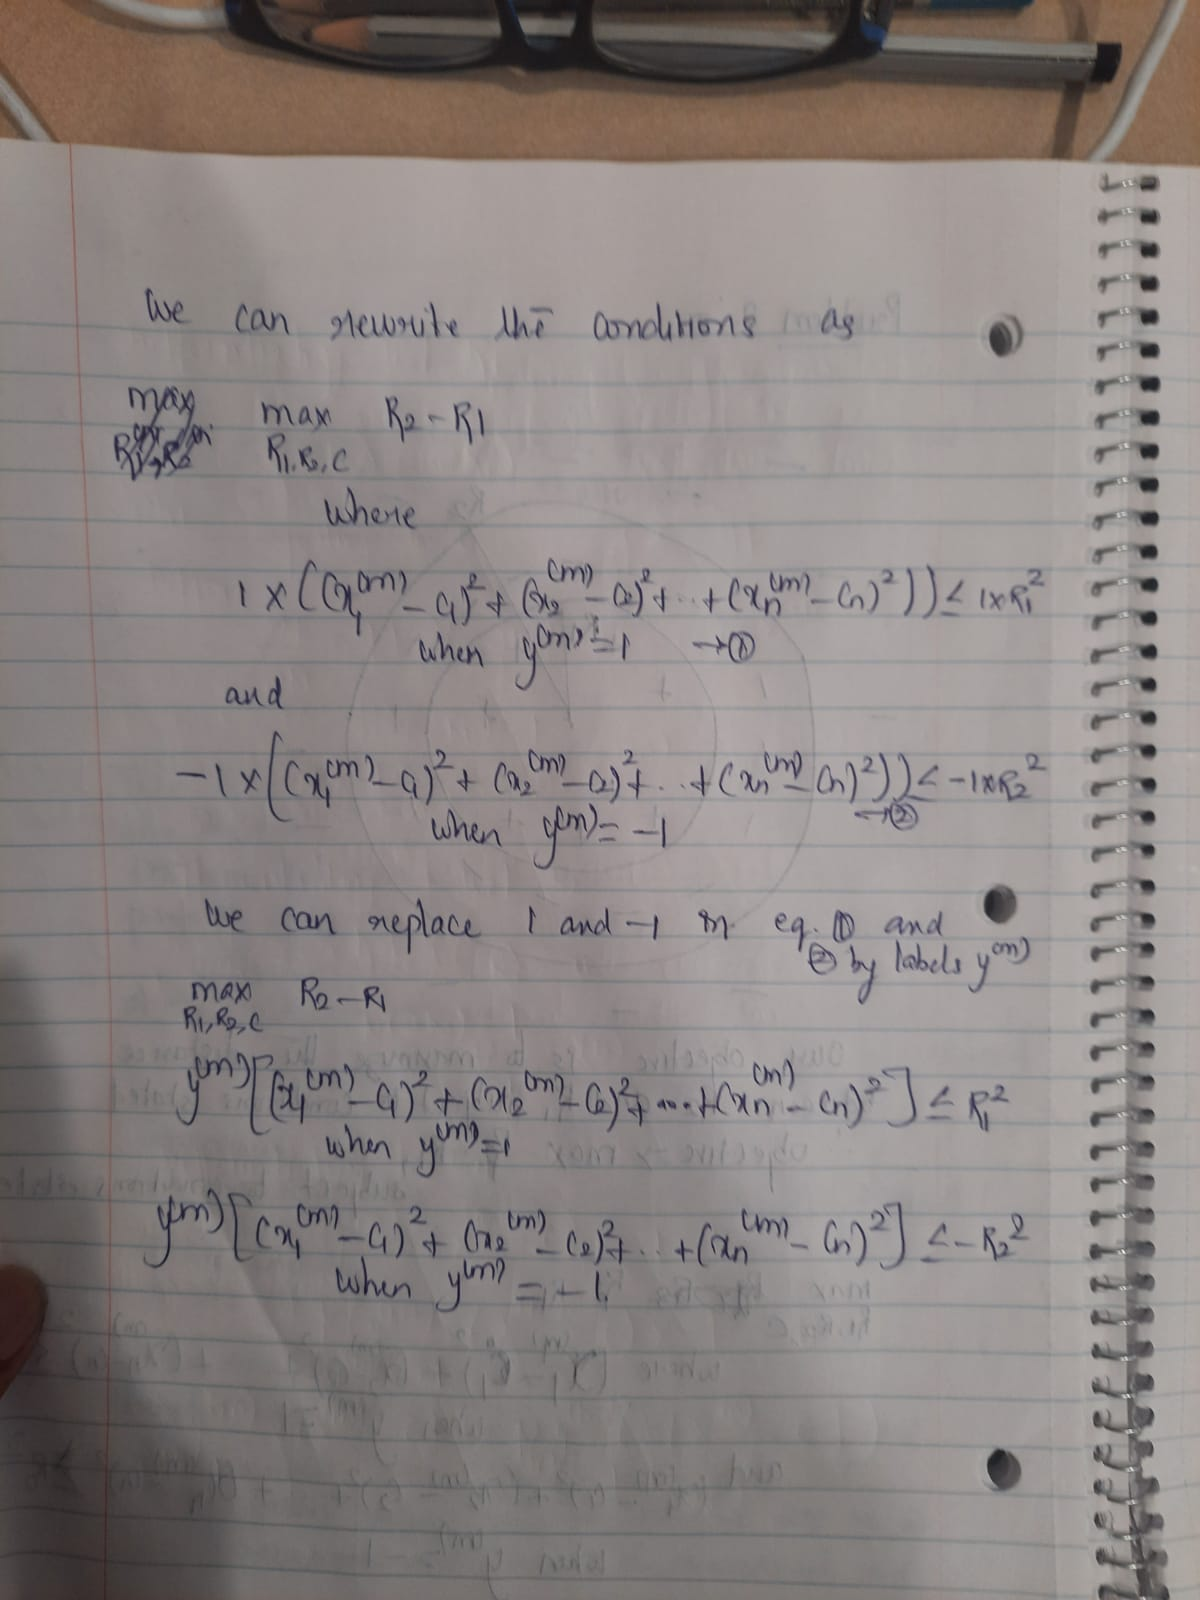

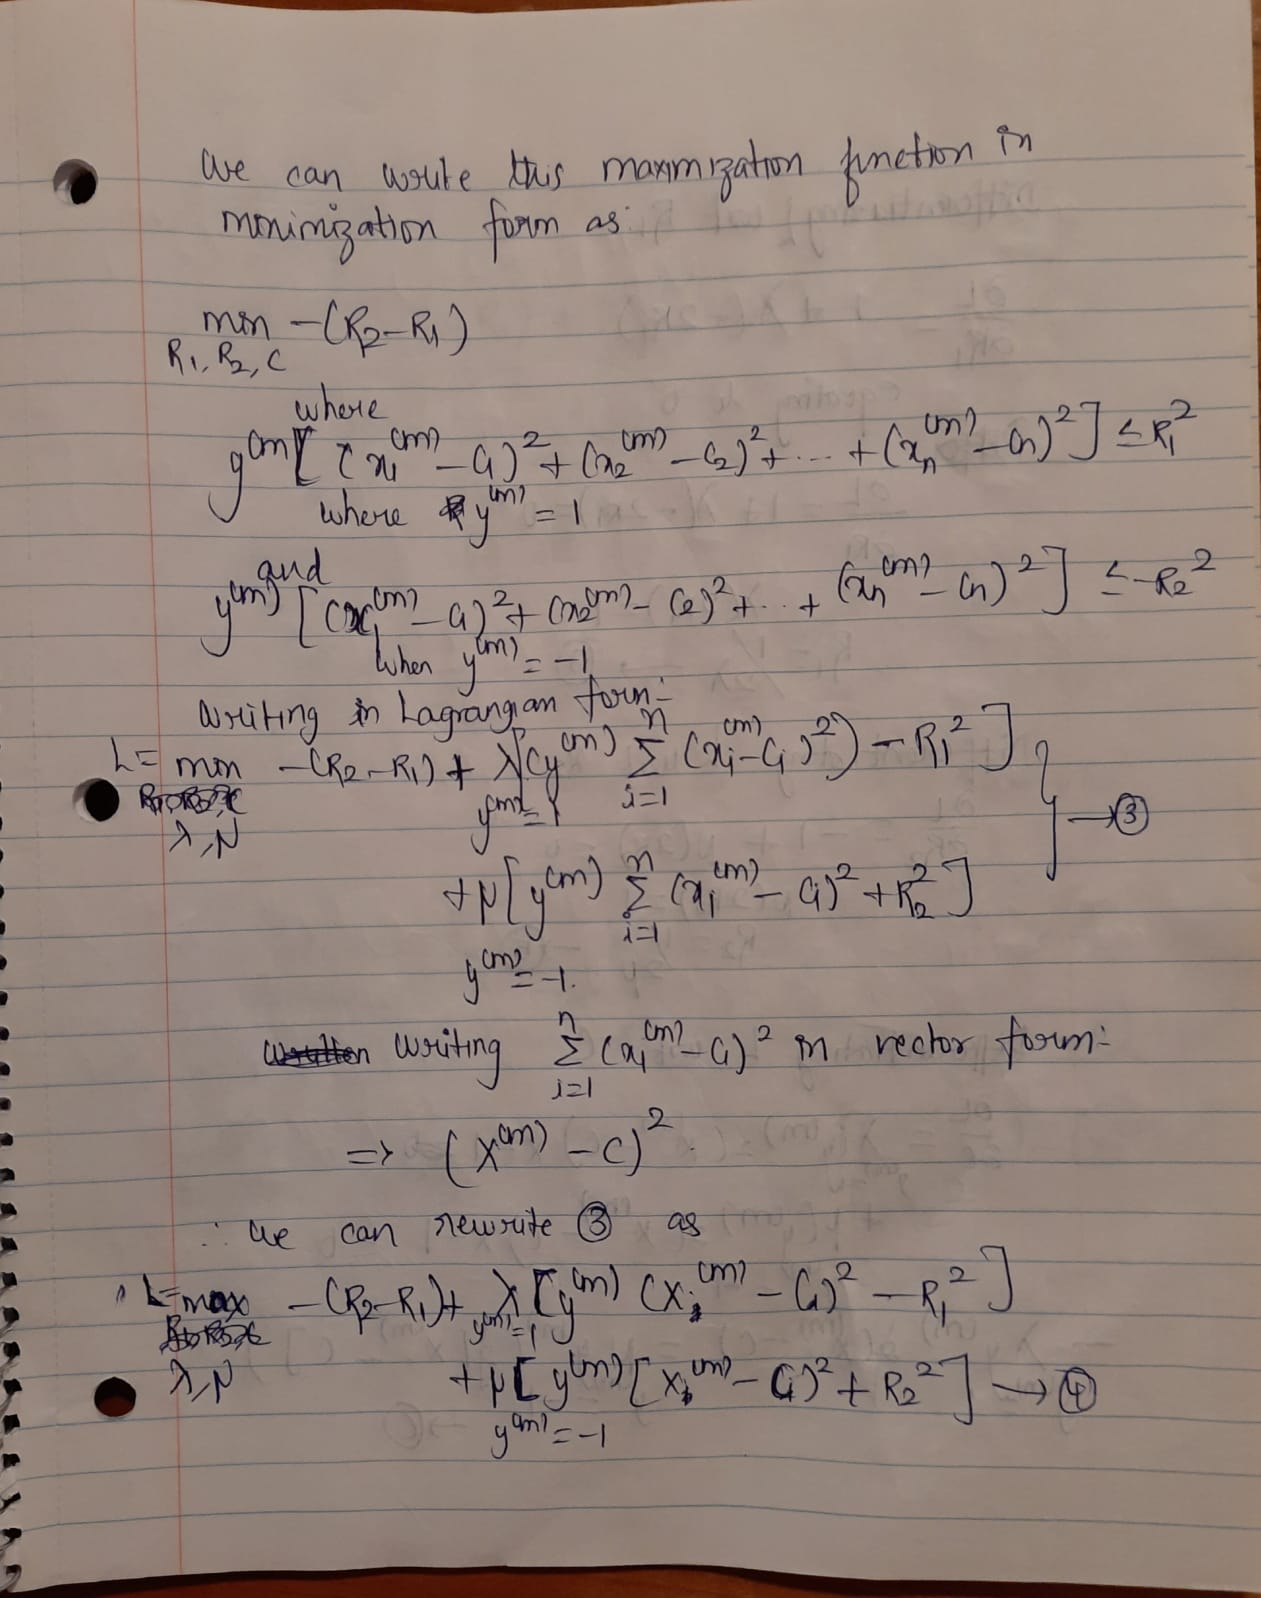

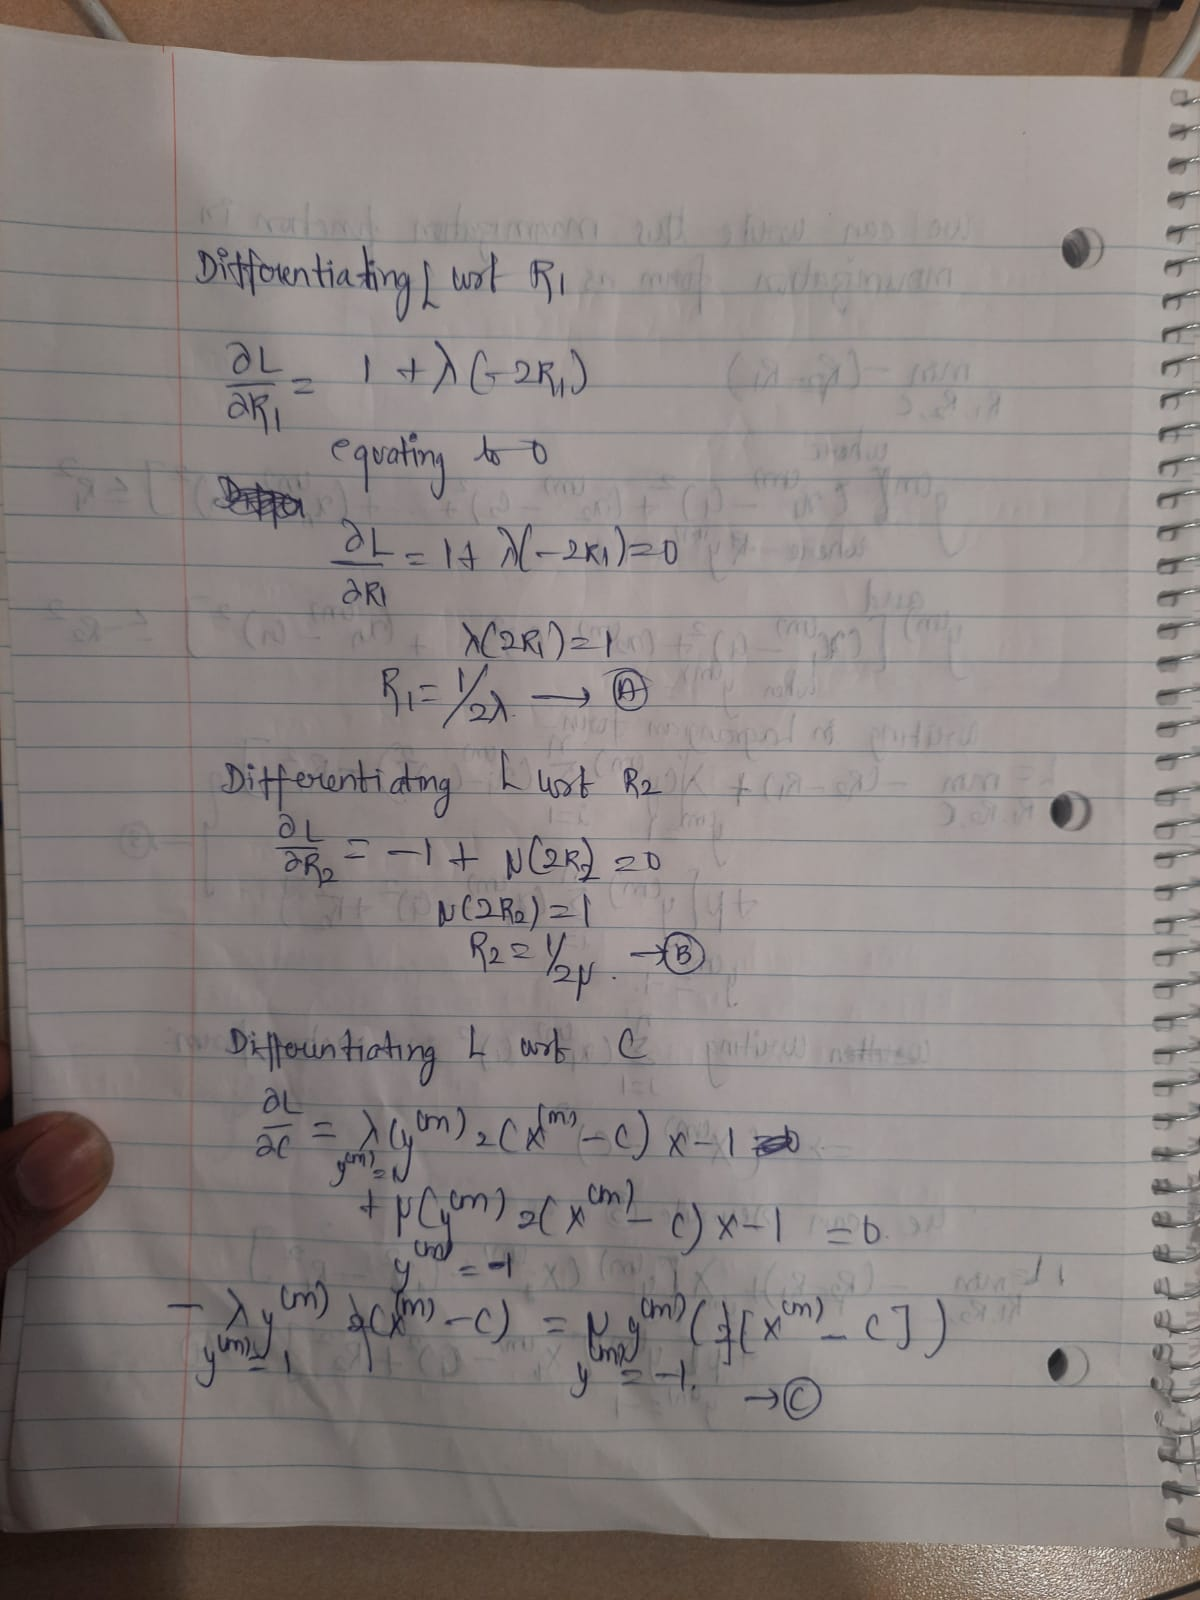

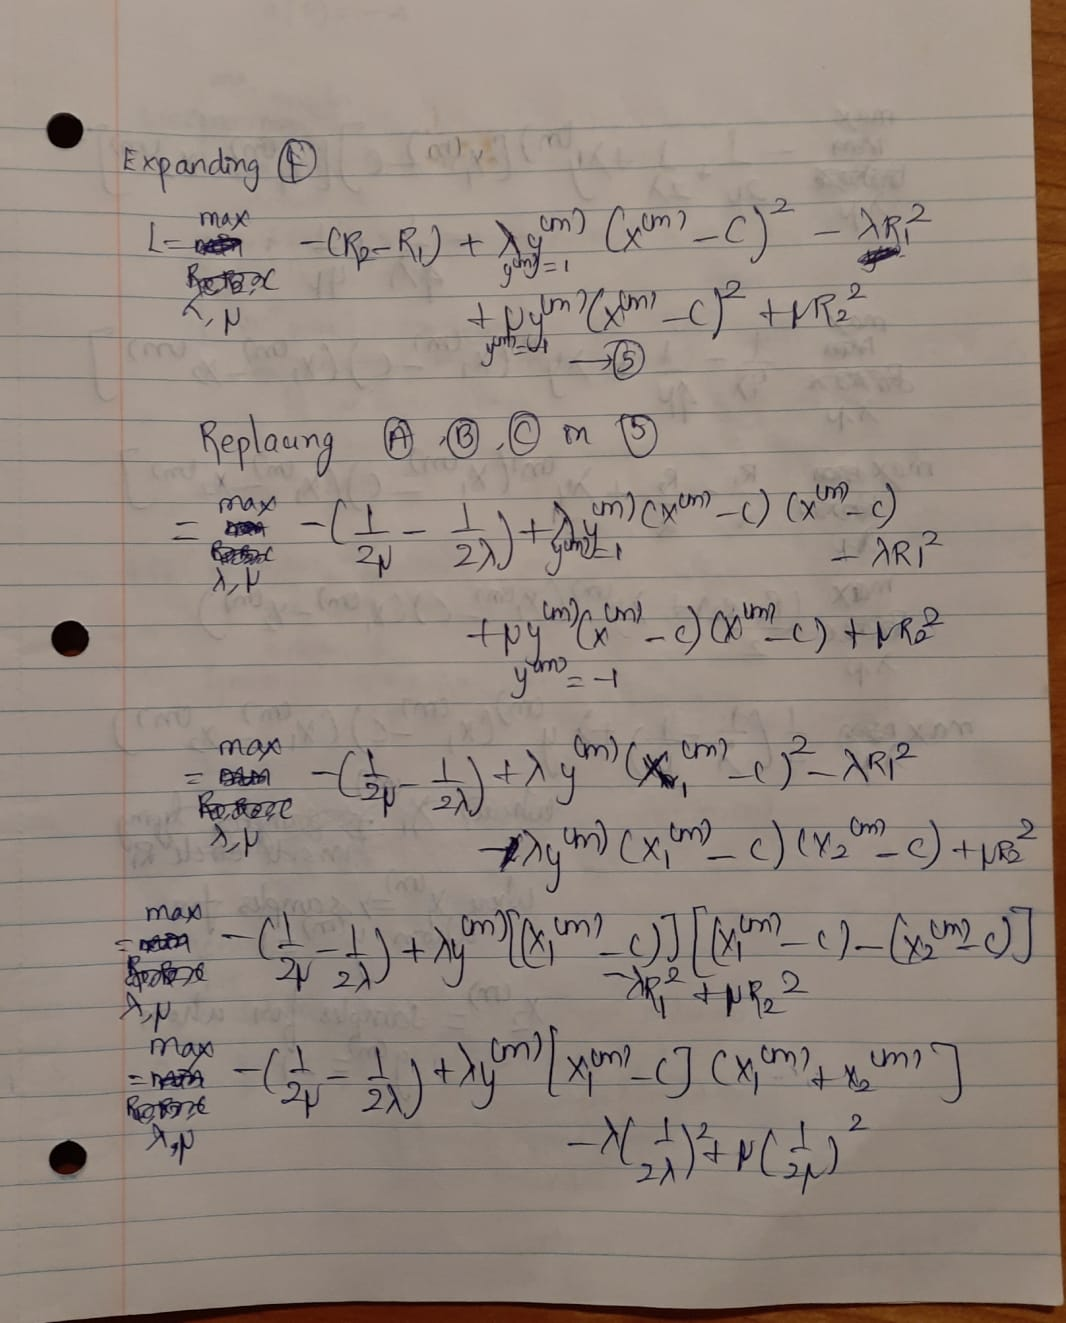

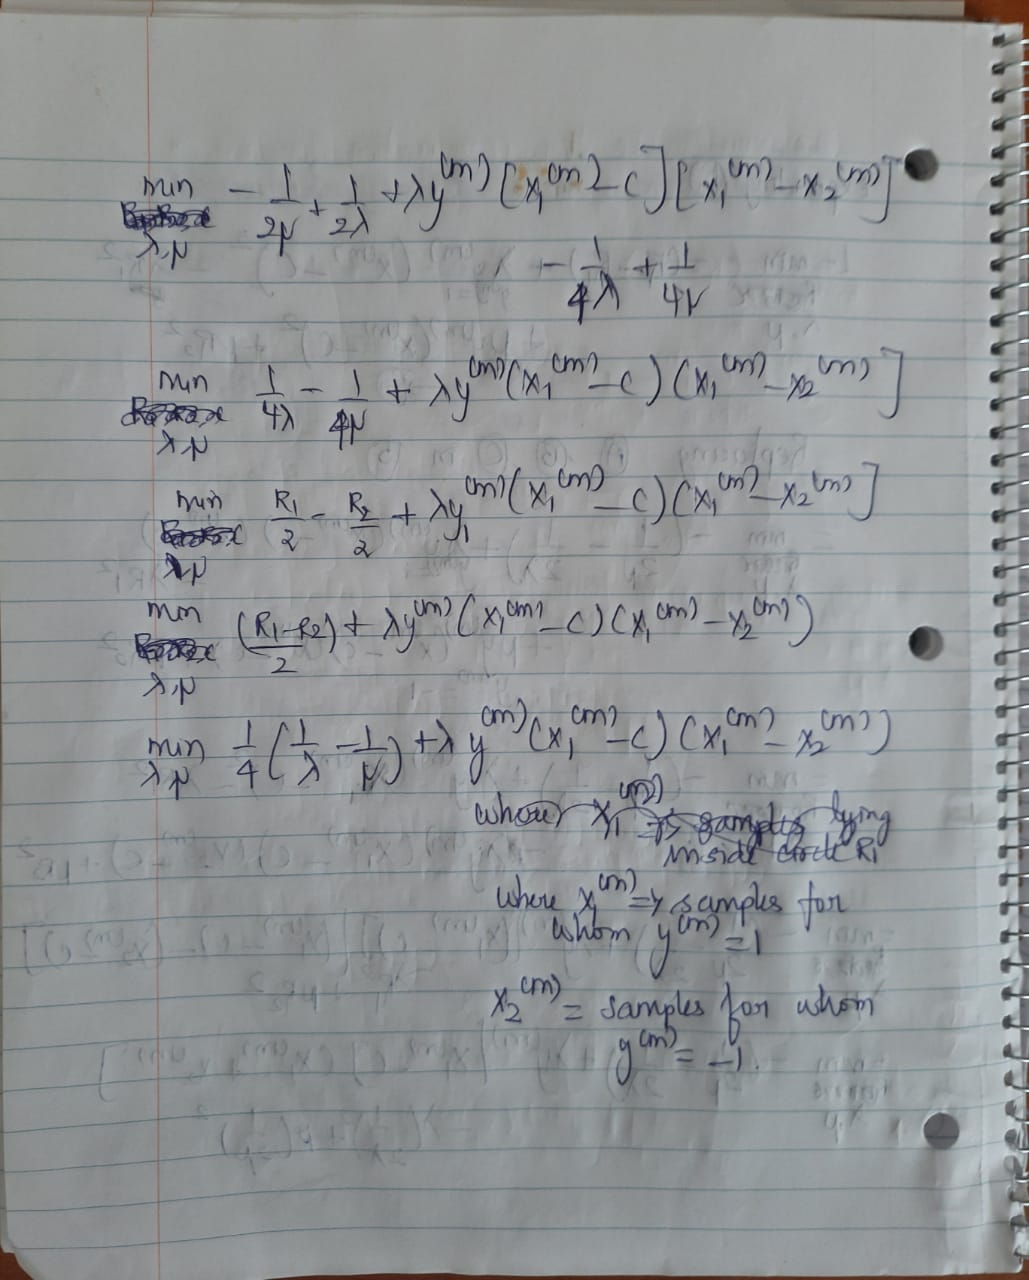

------------------------------------------------------------------------------
## Problem 3)1)a)

In [ ]:
import pandas as pd
import numpy as np
from copy import deepcopy
import json
import multiprocessing
from multiprocessing import Pool

In [ ]:
cols = ["Y", "F1", "F2", "F3", "F4", "F5", "F6", "F7", "F8", "F9", "F10", "F11", "F12", "F13", "F14", "F15", "F16", "F17", "F18", "F19", "F20", "F21", "F22"]
input_cols = cols[1:]
df_train = pd.read_csv('heart_train.data', names = cols, header=None, index_col=False)

In [ ]:
df_train['row_num'] = np.arange(len(df_train))

In [ ]:
df_train['Y']

0     1
1     1
2     1
3     1
4     1
     ..
75    0
76    0
77    0
78    0
79    0
Name: Y, Length: 80, dtype: int64

In [ ]:
df_train.loc[df_train['Y'] == 0, 'Y'] = -1

In [ ]:
df_train['Y']

0     1
1     1
2     1
3     1
4     1
     ..
75   -1
76   -1
77   -1
78   -1
79   -1
Name: Y, Length: 80, dtype: int64

In [ ]:
len(df_train.columns)

24

In [ ]:
len(cols)

23

In [ ]:
import itertools
perms = [p for p in itertools.product(input_cols, repeat=3)]

In [ ]:
len(perms)

10648

In [ ]:
leaves = [1, -1]
leaf_permutations = [p for p in itertools.product(leaves, repeat=4)]

In [ ]:
len(leaf_permutations)

16

In [ ]:
leaf_permutations

[(1, 1, 1, 1),
 (1, 1, 1, -1),
 (1, 1, -1, 1),
 (1, 1, -1, -1),
 (1, -1, 1, 1),
 (1, -1, 1, -1),
 (1, -1, -1, 1),
 (1, -1, -1, -1),
 (-1, 1, 1, 1),
 (-1, 1, 1, -1),
 (-1, 1, -1, 1),
 (-1, 1, -1, -1),
 (-1, -1, 1, 1),
 (-1, -1, 1, -1),
 (-1, -1, -1, 1),
 (-1, -1, -1, -1)]

# Total Permutations

In [ ]:
len(perms) * len(leaf_permutations) * 5

851840

Node Class

In [ ]:
class Node:
    def __init__(self, feature_name=None, left_child=None, right_child=None, end_tag=None):
        self.feature_name = feature_name
        self.left_child = left_child
        self.right_child = right_child
        self.end_tag = end_tag

class Trees:
    def __init__(self):
        self.trees = []
        self.feature_1 = 0
        self.feature_2 = 1
        self.feature_3 = 2

        self.tree_1 = None
        self.tree_2 = None
        self.tree_3 = None
        self.tree_4 = None
        self.tree_5 = None

        self.generate_trees()
  
    def generate_trees(self):
        tree_1 = Node(feature_name=self.feature_1)
        tree_1.right_child = Node(end_tag = 0)
        tree_1.left_child = Node(feature_name=self.feature_2)
        tree_1.left_child.right_child = Node(end_tag = 1)
        tree_1.left_child.left_child = Node(feature_name=self.feature_3)
        tree_1.left_child.left_child.left_child = Node(end_tag = 2)
        tree_1.left_child.left_child.right_child = Node(end_tag = 3)

        tree_2 = Node(feature_name=self.feature_1)
        tree_2.right_child = Node(end_tag = 0)
        tree_2.left_child = Node(feature_name=self.feature_2)
        tree_2.left_child.left_child = Node(end_tag = 1)
        tree_2.left_child.right_child = Node(feature_name=self.feature_3)
        tree_2.left_child.right_child.left_child = Node(end_tag = 2)
        tree_2.left_child.right_child.right_child = Node(end_tag = 3)

        tree_3 = Node(feature_name=self.feature_1)
        tree_3.left_child = Node(end_tag = 0)
        tree_3.right_child = Node(feature_name=self.feature_2)
        tree_3.right_child.left_child = Node(end_tag = 1)
        tree_3.right_child.right_child = Node(feature_name=self.feature_3)
        tree_3.right_child.right_child.left_child = Node(end_tag = 2)
        tree_3.right_child.right_child.right_child = Node(end_tag = 3)

        tree_4 = Node(feature_name=self.feature_1)
        tree_4.left_child = Node(end_tag = 0)
        tree_4.right_child = Node(feature_name=self.feature_2)
        tree_4.right_child.right_child = Node(end_tag = 1)
        tree_4.right_child.left_child = Node(feature_name=self.feature_3)
        tree_4.right_child.left_child.left_child = Node(end_tag = 2)
        tree_4.right_child.left_child.right_child = Node(end_tag = 3)

        tree_5 = Node(feature_name=self.feature_1)
        tree_5.left_child = Node(feature_name=self.feature_2)
        tree_5.left_child.left_child = Node(end_tag = 0)
        tree_5.left_child.right_child = Node(end_tag = 1)
        tree_5.right_child = Node(feature_name=self.feature_3)
        tree_5.right_child.left_child = Node(end_tag = 2)
        tree_5.right_child.right_child = Node(end_tag = 3)

        self.tree_1 = tree_1
        self.tree_2 = tree_2
        self.tree_3 = tree_3
        self.tree_4 = tree_4
        self.tree_5 = tree_5

        self.trees.extend([tree_1, tree_2, tree_3, tree_4, tree_5])
        return self.trees

In [ ]:
tree_node = Trees()

In [ ]:
tree_node.trees[0]

In [ ]:
def check_decision(tree, input_df, leaf_permutation, feature_permutation, weights):
    inaccuracies_left = 0
    inaccuracies_right = 0
    feature_name = feature_permutation[tree.feature_name]
    feature_0_split = input_df[input_df[feature_name] == 0]
    feature_1_split = input_df[input_df[feature_name] == 1]
    check_decisions_left = dict()
    check_decisions_right = dict()
    weighted_inaccuracy = 0
    left_weighted_inaccuracy = 0
    right_weighted_inaccuracy = 0
    if tree.left_child.feature_name != None:
        check_decisions_left, inaccuracies_left, left_weighted_inaccuracy = check_decision(tree.left_child, feature_0_split, leaf_permutation, feature_permutation, weights)
    if tree.right_child.feature_name != None:
        check_decisions_right, inaccuracies_right, right_weighted_inaccuracy = check_decision(tree.right_child, feature_1_split, leaf_permutation, feature_permutation, weights)
    if tree.left_child.feature_name == None:
        y_0_len = len(feature_0_split[feature_0_split["Y"] == -1])
        y_1_len = len(feature_0_split[feature_0_split["Y"] == 1])
        end_tag = tree.left_child.end_tag
        leaf_val = leaf_permutation[end_tag]
        if leaf_val == 1:
            inaccuracies_left += y_0_len
            for i in range(len(feature_0_split)):
                check_decisions_left[feature_0_split.iloc[i]['row_num']] = 1
                if feature_0_split.iloc[i]['Y'] != 1:
                    left_weighted_inaccuracy += weights[feature_0_split.iloc[i]['row_num']]
        else:
            inaccuracies_left += y_1_len
            for i in range(len(feature_0_split)):
                check_decisions_left[feature_0_split.iloc[i]['row_num']] = -1
                if feature_0_split.iloc[i]['Y'] != -1:
                    left_weighted_inaccuracy += weights[feature_0_split.iloc[i]['row_num']]

    if tree.right_child.feature_name == None:
        y_0_len = len(feature_1_split[feature_1_split["Y"] == -1])
        y_1_len = len(feature_1_split[feature_1_split["Y"] == 1])
        end_tag = tree.right_child.end_tag
        leaf_val = leaf_permutation[end_tag]
        if leaf_val == 1:
            inaccuracies_right += y_0_len
            for i in range(len(feature_1_split)):
                check_decisions_right[feature_1_split.iloc[i]['row_num']] = 1
                if feature_1_split.iloc[i]['Y'] != 1:
                    right_weighted_inaccuracy += weights[feature_1_split.iloc[i]['row_num']]
        else:
            inaccuracies_right += y_1_len
            for i in range(len(feature_1_split)):
                check_decisions_right[feature_1_split.iloc[i]['row_num']] = -1
                if feature_1_split.iloc[i]['Y'] != -1:
                    right_weighted_inaccuracy += weights[feature_1_split.iloc[i]['row_num']]

    total_inaccuracies = 0
    total_decisions = dict()
    total_decisions.update(check_decisions_left)
    total_decisions.update(check_decisions_right)
    total_inaccuracies = inaccuracies_left + inaccuracies_right
    weighted_inaccuracy = left_weighted_inaccuracy + right_weighted_inaccuracy
    return total_decisions, total_inaccuracies, weighted_inaccuracy

def test_tree(tree, input_row):
    if tree.end_val:
        return tree.end_val
    feature_name = tree.feature_name
    if input_row[feature_name] == 1:
        decision = test_tree(tree.left_child, input_row)
    else:
        decision = test_tree(tree.right_child, input_row)
    return decision

def find_best_tree(tree_node, input_df, leaf_permutations, feature_permutations, results, thread_index):
    best_inaccuracy = None
    best_tree_decisions = None
    best_feature_split_index = None
    best_tree_index = None
    best_leaf_perm_index = None
    for feature_split_index, feature_permutation in enumerate(feature_permutations):
        for index in range(5):
            tree_loc = tree_node.trees[index]
            for leaf_perm_index, leaf_permutation in enumerate(leaf_permutations):
                loc_decisions, loc_inaccuracies, weighted_inaccuracy = check_decision(tree_loc, input_df, leaf_permutation, feature_permutation)
                # print("Inaccuracy:", loc_inaccuracies)
                if not best_inaccuracy or loc_inaccuracies < best_inaccuracy:
                    best_inaccuracy = loc_inaccuracies
                    best_tree_decisions = loc_decisions
                    best_feature_split_index = feature_split_index
                    best_tree_index = index
                    best_leaf_perm_index = leaf_perm_index
    print("thread_index:", thread_index, "best_inaccuracy", best_inaccuracy)
    result_dictionary = dict()
    result_dictionary['best_inaccuracy'] = best_inaccuracy
    result_dictionary['best_tree_decisions'] = best_tree_decisions
    result_dictionary['best_feature_split_index'] = best_feature_split_index
    result_dictionary['best_tree_index'] = best_tree_index
    result_dictionary['best_leaf_perm_index'] = best_leaf_perm_index
    results[thread_index] = result_dictionary
    return results

def find_best_stump(stumps=None, input_df=None, leaf_permutations=None):
    best_stump = None
    best_inaccuracy = None
    best_stump_decisions = None
    for stump in stumps:
        stump_loc = stump.tree
        loc_decisions, loc_inaccuracies = check_decision(stump_loc, input_df)
        if not best_inaccuracy or loc_inaccuracies < best_inaccuracy:
            best_inaccuracy = loc_inaccuracies
            best_stump = stump
            best_stump_decisions = loc_decisions
    return best_stump, best_inaccuracy, best_stump_decisions

def stump_decision(stumps=None, index=None, input_df=None):
    stump = stumps[index]
    stump_node = stump.tree
    loc_decisions, loc_inaccuracies = check_decision(stump_node, input_df)
    return loc_decisions, loc_inaccuracies

def stump_decisions(stumps=None, input_df=None):
    best_stump = None
    best_inaccuracy = None
    best_stump_decisions = None
    stump_inaccuracy = dict()
    stump_decs = dict()
    for stump in stumps:
        stump_loc = stump.tree
        loc_decisions, loc_inaccuracies = check_decision(stump_loc, input_df)
        if not best_inaccuracy or loc_inaccuracies < best_inaccuracy:
            best_inaccuracy = loc_inaccuracies
            best_stump = stump
            best_stump_decisions = loc_decisions
        stump_inaccuracy[stump.feature] = loc_inaccuracies
        stump_decs[stump.feature] = loc_decisions
    return best_stump, best_inaccuracy, best_stump_decisions, stump_inaccuracy, stump_decs

def coordinate_stump_decisions(stumps=None, input_df=None):
    stump_inaccuracy = dict()
    stump_decisions = dict()
    for stump in stumps:
        print("Feature:", stump.feature)
        stump_loc = stump.tree
        loc_decisions, loc_inaccuracies = check_decision(stump_loc, input_df)
        stump_inaccuracy[stump.feature] = loc_inaccuracies
        stump_decisions[stump.feature] = loc_decisions
    return stump_inaccuracy, stump_decisions

In [ ]:
weights = np.array([1/len(df_train)] * len(df_train))

# Running the decision tree training as a Multi-Process Operation (To Speed Up Training Time)

In [ ]:
from copy import deepcopy
num_processes = 4
permutation_slice_len = len(perms) // num_processes
permutation_slices = []
tree_node_copies = []
df_train_copies = []
leaf_permutations_copies = []
indices = []
results = []
weights_copies = []
for index in range(num_processes):
    df_train_copies.append(deepcopy(df_train))
    tree_node_copies.append(deepcopy(tree_node))
    leaf_permutations_copies.append(deepcopy(leaf_permutations))
    indices.append(index)
    if index != (num_processes - 1):
        perm_slice = perms[index * permutation_slice_len: (index + 1) * permutation_slice_len]
    else:
        perm_slice = perms[index * permutation_slice_len:]
    weights_copies.append(deepcopy(weights))
    permutation_slices.append(perm_slice)

args = []
for index in range(num_processes):
    args.append([tree_node_copies[index], df_train_copies[index], leaf_permutations_copies[index], permutation_slices[index], index, weights_copies[index]])

print(len(permutation_slices[0]), len(permutation_slices[1]), len(permutation_slices[3]))

2662 2662 2662


In [ ]:
def find_best_tree_process(arguments):
    tree_node, input_df, leaf_permutations, feature_permutations, process_index, weights = arguments
    best_inaccuracy = None
    best_tree_decisions = None
    best_feature_split_index = None
    best_tree_index = None
    best_weighted_inaccuracy = None
    best_leaf_perm_index = None
    best_feature_perm = None
    best_leaf_perm = None
    for feature_split_index, feature_permutation in enumerate(feature_permutations):
        for index in range(5):
            tree_loc = tree_node.trees[index]
            for leaf_perm_index, leaf_permutation in enumerate(leaf_permutations):
                loc_decisions, loc_inaccuracies, weighted_inaccuracy = check_decision(tree_loc, input_df, leaf_permutation, feature_permutation, weights)
                if not best_weighted_inaccuracy or weighted_inaccuracy < best_weighted_inaccuracy:
                    best_inaccuracy = loc_inaccuracies
                    best_weighted_inaccuracy = weighted_inaccuracy
                    best_tree_decisions = loc_decisions
                    best_feature_split_index = feature_split_index
                    best_tree_index = index
                    best_leaf_perm_index = leaf_perm_index
                    best_feature_perm = feature_permutation
                    best_leaf_perm = leaf_permutation
    # print("process_index:", process_index, "best_inaccuracy", best_inaccuracy, "best_weighted_inaccuracy:", best_weighted_inaccuracy)
    result_dictionary = dict()
    result_dictionary['best_inaccuracy'] = best_inaccuracy
    result_dictionary['best_weighted_inaccuracy'] = best_weighted_inaccuracy
    result_dictionary['best_tree_decisions'] = best_tree_decisions
    result_dictionary['best_feature_split_index'] = best_feature_split_index
    result_dictionary['best_tree_index'] = best_tree_index
    result_dictionary['best_leaf_perm_index'] = best_leaf_perm_index
    result_dictionary['best_feature_perm'] = best_feature_perm
    result_dictionary['best_leaf_perm'] = best_leaf_perm
    # print("---------")
    return result_dictionary

In [ ]:
len(args)

4

In [ ]:
solution_trees = []

In [ ]:
import json
def start_training_from_checkpoint(train_file_name, args):
    with open(train_file_name, 'r') as fp:
        result_artifacts = json.load(fp)
    weights = np.array(json.loads(result_artifacts['weights']))
    for i in range(num_processes):
        args[i][-1] = weights

In [ ]:
# start_training_from_checkpoint('result_complete_8.json', args)

In [ ]:
import json
import multiprocessing
from multiprocessing import Pool

class NumpyEncoder(json.JSONEncoder):
    """ Special json encoder for numpy types """
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        return json.JSONEncoder.default(self, obj)

cores = multiprocessing.cpu_count()
num_rounds = 10
for round in range(num_rounds):
    p = Pool(cores)
    results = p.map(find_best_tree_process, args)
    best_result = None
    best_weighted_inacc = None
    for index, result in enumerate(results):
        if not best_weighted_inacc or result['best_weighted_inaccuracy'] < best_weighted_inacc:
            best_result = index
            best_weighted_inacc = result['best_weighted_inaccuracy']
    solution = results[best_result]
    solution['weights'] = args[index][-1]
    alpha_t = 0.5 * np.log((1 - solution['best_weighted_inaccuracy']) / solution['best_weighted_inaccuracy'])
    solution['alpha_t'] = alpha_t
    best_tree_decisions_list = list(map(lambda x: solution['best_tree_decisions'][x], list(range(len(df_train)))))
    pred_hypothesis = np.multiply(np.array(best_tree_decisions_list), alpha_t)
    pred_hypothesis = np.multiply(np.array(list(df_train['Y'])), pred_hypothesis)
    pred_hypothesis = np.multiply(-1, pred_hypothesis)
    next_weights = np.multiply(weights, np.exp(pred_hypothesis))
    denom = np.multiply(2, np.sqrt(np.multiply(solution['best_weighted_inaccuracy'], (1 - solution['best_weighted_inaccuracy']))))
    next_weights = np.divide(next_weights, denom)
    for i in range(num_processes):
        args[i][-1] = next_weights
    solution_trees.append(solution)

    sol_mod = dict()
    for key, val in solution.items():
        if key != 'best_tree_decisions':
            sol_mod[key] = json.dumps(val, cls=NumpyEncoder)
        else:
            inner_dict = dict()
            for inner_key, inner_val in val.items():
                inner_dict[int(inner_key)] = inner_val
            sol_mod[key] = json.dumps(inner_dict, cls=NumpyEncoder)

    with open('result_complete_{round}.json'.format(round=round + 9), 'w') as fp:
        json.dump(sol_mod, fp, indent=4)
    # print(results)

In [ ]:
solution_trees = []

In [ ]:
num_rounds = 10
for file_index in range(num_rounds):
    with open('result_complete_{index}.json'.format(index=file_index), 'r') as fp:
        solution = json.load(fp)
        solution_trees.append(solution)

In [ ]:
len(solution_trees)

10

In [ ]:
for index in range(len(solution_trees)):
    solution_trees[index]['best_feature_perm'] = json.loads(solution_trees[index]['best_feature_perm'])
    solution_trees[index]['best_tree_index'] = int(solution_trees[index]['best_tree_index'])
    solution_trees[index]['best_leaf_perm'] = json.loads(solution_trees[index]['best_leaf_perm'])
    solution_trees[index]['alpha_t'] = float(solution_trees[index]['alpha_t'])
    solution_trees[index]['weights'] = json.loads(solution_trees[index]['weights'])

# 3)a) Selected Classifier In First Five Rounds and their corresponding weighted errors and alphas

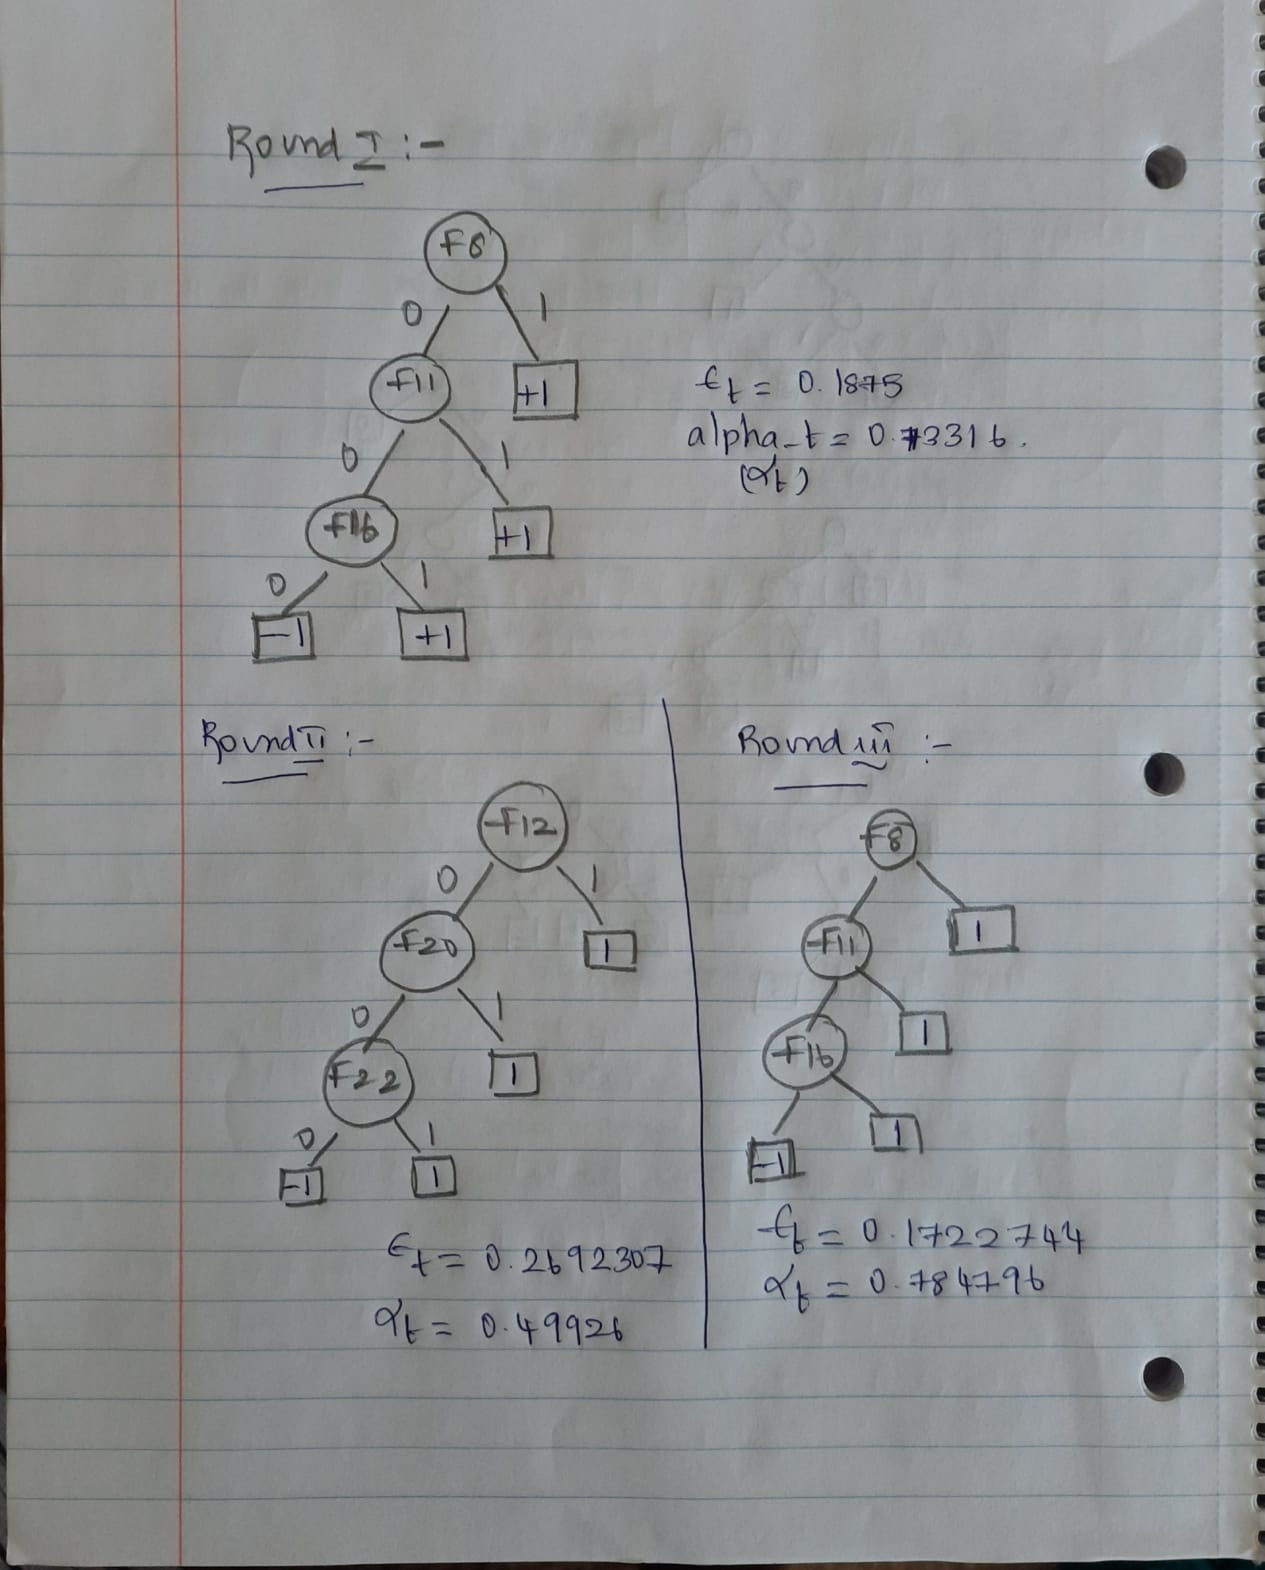

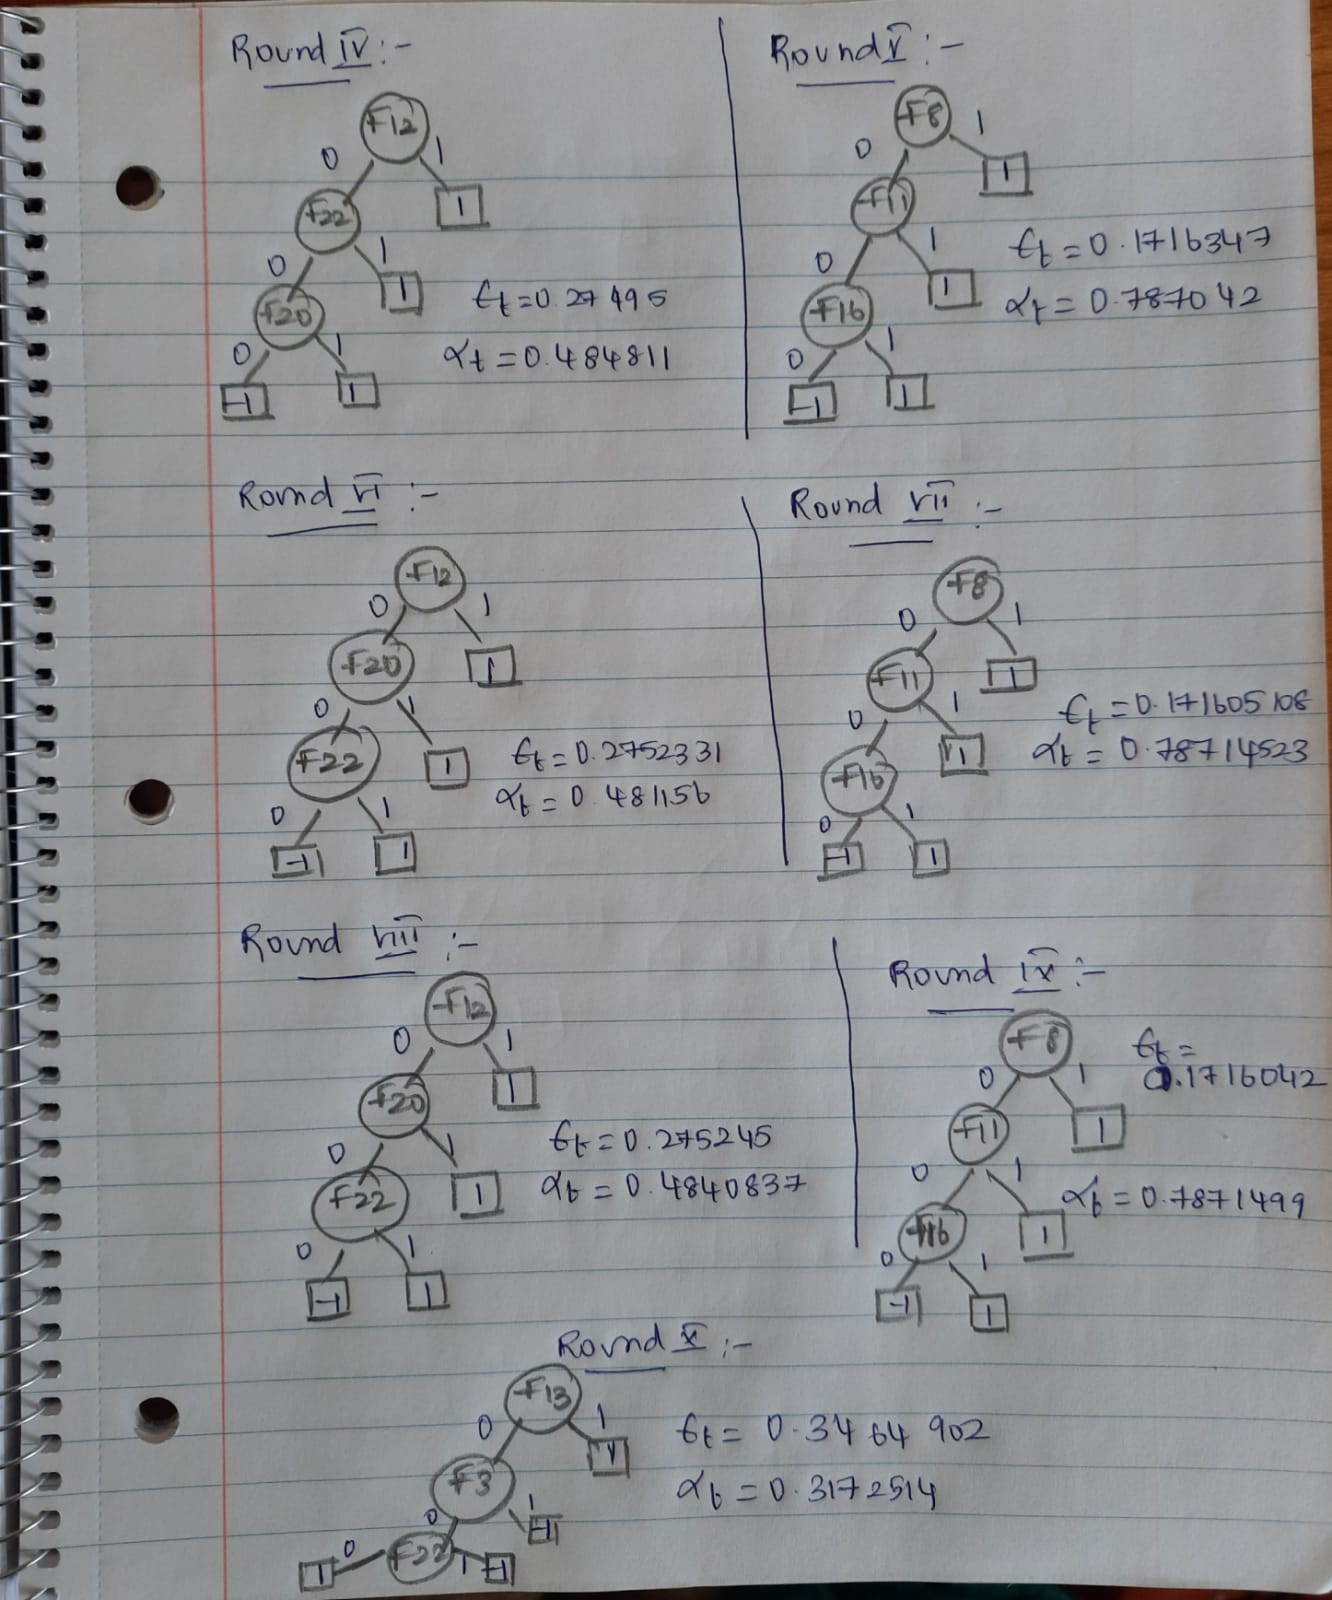

In [ ]:
len(solution_trees)

10

In [ ]:
for index in range(5):
    print("Tree Index:", (index + 1), "Weighted Error (e_t):", solution_trees[index]['best_weighted_inaccuracy'], "alpha_t:", solution_trees[index]['alpha_t'])

Tree Index: 1 Weighted Error (e_t): 0.1875 alpha_t: 0.7331685343967135
Tree Index: 2 Weighted Error (e_t): 0.2692307692307692 alpha_t: 0.4992644150555637
Tree Index: 3 Weighted Error (e_t): 0.17227443609022555 alpha_t: 0.7847964454828773
Tree Index: 4 Weighted Error (e_t): 0.2749558313326496 alpha_t: 0.4848110519338659
Tree Index: 5 Weighted Error (e_t): 0.1716347447893446 alpha_t: 0.7870427722884347


------------------------------------------------------------------------------
3)1)b) Accuracy on Training and Tests for Ten Rounds

In [ ]:
def test_decisions(tree, input_df, leaf_permutation, feature_permutation, weights, alpha_t_val):
    feature_name = feature_permutation[tree.feature_name]
    feature_0_split = input_df[input_df[feature_name] == 0]
    feature_1_split = input_df[input_df[feature_name] == 1]
    check_decisions_left = dict()
    check_decisions_right = dict()
    weighted_decisions_left = dict()
    weighted_decisions_right = dict()
    if tree.left_child.feature_name != None:
        check_decisions_left, weighted_decisions_left = test_decisions(tree.left_child, feature_0_split, leaf_permutation, feature_permutation, weights, alpha_t_val)
    if tree.right_child.feature_name != None:
        check_decisions_right, weighted_decisions_right = test_decisions(tree.right_child, feature_1_split, leaf_permutation, feature_permutation, weights, alpha_t_val)
    if tree.left_child.feature_name == None:
        end_tag = tree.left_child.end_tag
        leaf_val = leaf_permutation[end_tag]
        if leaf_val == 1:
            for i in range(len(feature_0_split)):
                check_decisions_left[feature_0_split.iloc[i]['row_num']] = 1
                weighted_decisions_left[feature_0_split.iloc[i]['row_num']] = 1 * alpha_t_val
        else:
            for i in range(len(feature_0_split)):
                check_decisions_left[feature_0_split.iloc[i]['row_num']] = -1
                weighted_decisions_left[feature_0_split.iloc[i]['row_num']] = -1 * alpha_t_val

    if tree.right_child.feature_name == None:
        end_tag = tree.right_child.end_tag
        leaf_val = leaf_permutation[end_tag]
        if leaf_val == 1:
            for i in range(len(feature_1_split)):
                check_decisions_right[feature_1_split.iloc[i]['row_num']] = 1
                weighted_decisions_right[feature_1_split.iloc[i]['row_num']] = 1 * alpha_t_val
        else:
            for i in range(len(feature_1_split)):
                check_decisions_right[feature_1_split.iloc[i]['row_num']] = -1
                weighted_decisions_right[feature_1_split.iloc[i]['row_num']] = -1 * alpha_t_val

    total_decisions = dict()
    weighted_decisions = dict()
    total_decisions.update(check_decisions_left)
    total_decisions.update(check_decisions_right)
    weighted_decisions.update(weighted_decisions_left)
    weighted_decisions.update(weighted_decisions_right)
    return total_decisions, weighted_decisions

def test_dt(tree_node=None, input_df=None, feature_permutation=None, tree_index=None, leaf_permutation=None, weights=None, alpha_t_val=None):
    tree_loc = tree_node.trees[tree_index]
    total_decisions, weighted_decisions = test_decisions(tree_loc, input_df, leaf_permutation, feature_permutation, weights, alpha_t_val)
    return total_decisions, weighted_decisions

In [ ]:
cols_test = ["Y", "F1", "F2", "F3", "F4", "F5", "F6", "F7", "F8", "F9", "F10", "F11", "F12", "F13", "F14", "F15", "F16", "F17", "F18", "F19", "F20", "F21", "F22"]
df_test = pd.read_csv('heart_test.data', names = cols_test, header=None, index_col=False)
df_test.loc[df_test["Y"] == 0, 'Y'] = -1
df_test['row_num'] = np.arange(len(df_test))

Computing Test Accuracy at the end of 10th round

In [ ]:
# input_df = df_train
input_df = df_test
if 'row_num' not in input_df.columns:
    input_df['row_num'] = np.arange(len(input_df))

In [ ]:
weighted_decisions = []
for sol_tree in solution_trees[:10]:
    total_decision_dict, weighted_decision_dict = test_dt(tree_node=tree_node, input_df=input_df, feature_permutation=sol_tree['best_feature_perm'], tree_index=sol_tree['best_tree_index'], leaf_permutation=sol_tree['best_leaf_perm'], weights=sol_tree['weights'], alpha_t_val=sol_tree['alpha_t'])
    weighted_decisions.append(weighted_decision_dict)

In [ ]:
len(weighted_decisions)

10

In [ ]:
row_decisions = [0] * len(input_df)
for sol_index, weighted_decision_dict in enumerate(weighted_decisions):
    for key, weight in weighted_decision_dict.items():
        row_decisions[key] += weight

In [ ]:
accuracy = 0
for index in range(len(input_df)):
    if input_df.iloc[index]['Y'] == 1 and row_decisions[index] >= 0:
        accuracy += 1
    elif input_df.iloc[index]['Y'] == -1 and row_decisions[index] < 0:
        accuracy += 1
acc_percentage = accuracy / len(input_df)
acc_percentage

0.7593582887700535

In [ ]:
weighted_decisions_train = []
weighted_decisions_test = []
for sol_tree in solution_trees:
    total_decision_dict, weighted_decision_dict = test_dt(tree_node=tree_node, input_df=df_train, feature_permutation=sol_tree['best_feature_perm'], tree_index=sol_tree['best_tree_index'], leaf_permutation=sol_tree['best_leaf_perm'], weights=sol_tree['weights'], alpha_t_val=sol_tree['alpha_t'])
    weighted_decisions_train.append(weighted_decision_dict)
for sol_tree in solution_trees:
    total_decision_dict, weighted_decision_dict = test_dt(tree_node=tree_node, input_df=df_test, feature_permutation=sol_tree['best_feature_perm'], tree_index=sol_tree['best_tree_index'], leaf_permutation=sol_tree['best_leaf_perm'], weights=sol_tree['weights'], alpha_t_val=sol_tree['alpha_t'])
    weighted_decisions_test.append(weighted_decision_dict)

In [ ]:
def compute_accuracy(input_df=None, weighted_decisions=None):
    row_decisions = [0] * len(input_df)
    for sol_index, weighted_decision_dict in enumerate(weighted_decisions):
        for key, weight in weighted_decision_dict.items():
            row_decisions[key] += weight

    accuracy = 0
    for index in range(len(input_df)):
        if input_df.iloc[index]['Y'] == 1 and row_decisions[index] >= 0:
            accuracy += 1
        elif input_df.iloc[index]['Y'] == -1 and row_decisions[index] < 0:
            accuracy += 1
    acc_percentage = accuracy / len(input_df)
    return acc_percentage

Training and Test Accuracy for all 10 rounds

In [ ]:
num_rounds = 10
train_accuracy_rounds = []
test_accuracy_rounds = []
for round in range(num_rounds):
    train_accuracy_rounds.append(compute_accuracy(input_df=df_train, weighted_decisions=weighted_decisions_train[:(round + 1)]))
    test_accuracy_rounds.append(compute_accuracy(input_df=df_test, weighted_decisions=weighted_decisions_test[:(round + 1)]))

# Train Accuracy at the end of 10 rounds

In [ ]:
train_accuracy_rounds[num_rounds - 1]

0.8125

# Test Accuracy at the end of 10 rounds

In [ ]:
test_accuracy_rounds[num_rounds - 1]

0.7593582887700535

------------------------------------------------------------------------------
# Problem 3)2)a) Coordinate Descent 

In [ ]:
class Stump_Node:
    def __init__(self, feature_name=None, left_child=None, right_child=None, end_tag=None):
        self.feature_name = feature_name
        self.left_child = left_child
        self.right_child = right_child
        self.end_tag = end_tag

class Stumps:
    def __init__(self):
        self.feature = 0
        self.tree = None
        self.generate_trees()
  
    def generate_trees(self):
        tree = Stump_Node(feature_name=self.feature)
        tree.left_child = Stump_Node(end_tag=0)
        tree.right_child = Stump_Node(end_tag=1)
        self.tree = tree

In [ ]:
stump_node = Stumps()

In [ ]:
stump_node.tree

In [ ]:
import itertools
stump_perms = [p for p in itertools.product(input_cols, repeat=1)]

In [ ]:
stump_perms

[('F1',),
 ('F2',),
 ('F3',),
 ('F4',),
 ('F5',),
 ('F6',),
 ('F7',),
 ('F8',),
 ('F9',),
 ('F10',),
 ('F11',),
 ('F12',),
 ('F13',),
 ('F14',),
 ('F15',),
 ('F16',),
 ('F17',),
 ('F18',),
 ('F19',),
 ('F20',),
 ('F21',),
 ('F22',)]

In [ ]:
leaves = [1, -1]
stump_leaf_permutations = [p for p in itertools.product(leaves, repeat=2)]

In [ ]:
stump_leaf_permutations

[(1, 1), (1, -1), (-1, 1), (-1, -1)]

In [ ]:
def check_decision(tree, input_df, feature_permutation, end_tag_dict):
    feature_name = feature_permutation[tree.feature_name]
    feature_0_split = input_df[input_df[feature_name] == 0]
    feature_1_split = input_df[input_df[feature_name] == 1]
    if tree.left_child.feature_name != None:
        check_decision(tree.left_child, feature_0_split, feature_permutation, end_tag_dict)
    if tree.right_child.feature_name != None:
        check_decision(tree.right_child, feature_1_split, feature_permutation, end_tag_dict)
    if tree.left_child.feature_name == None:
        end_tag = tree.left_child.end_tag
        end_tag_dict[end_tag] = feature_0_split
    if tree.right_child.feature_name == None:
        end_tag = tree.right_child.end_tag
        end_tag_dict[end_tag] = feature_1_split
    return

In [ ]:
from collections import defaultdict
def find_stump_decisions(tree_node=None, input_df=None, leaf_permutations=None, feature_permutations=None):
    result_dictionary = defaultdict(lambda: defaultdict(dict))
    for feature_split_index, feature_permutation in enumerate(feature_permutations):
        tree_loc = tree_node.tree
        end_tag_dict = dict()
        check_decision(tree_loc, input_df, feature_permutation, end_tag_dict)
        for leaf_perm_index, leaf_permutation in enumerate(leaf_permutations):
            loc_decisions = dict()
            for leaf_index, leaf_val in enumerate(leaf_permutation):
                feature_split = end_tag_dict[leaf_index]
                if leaf_val == 1:
                    for i in range(len(feature_split)):
                        loc_decisions[feature_split.iloc[i]['row_num']] = 1
                else:
                    for i in range(len(feature_split)):
                        loc_decisions[feature_split.iloc[i]['row_num']] = -1
            result_dictionary[feature_split_index][leaf_perm_index] = loc_decisions
    return result_dictionary

In [ ]:
alpha_t = np.array([[1 / (len(stump_perms) * len(stump_leaf_permutations))] * 4] * len(stump_perms), dtype=np.float128)

In [ ]:
import scipy
from scipy.special import logsumexp

In [ ]:
def calculate_alpha(input_df=None, leaf_permutations=None, feature_permutations=None, decision_dict=None, feature_cur_index=None, leaf_cur_index=None, alpha_t=None):
    input_Ys = list(input_df['Y'])
    feat_decisions = []
    for index in range(len(input_Ys)):
        feat_decisions.append(decision_dict[feature_cur_index][leaf_cur_index][index])
    numerator_sum = np.float128(0)
    denominator_sum = np.float128(0)
    numerator_list = []
    denominator_list = []
    for row_index in range(len(input_df)):
        incorrect_weight = np.float128(0)
        correct_weight = np.float128(0)
        for feature_index, feature_permutation in enumerate(feature_permutations):
            for leaf_index, leaf_permutation in enumerate(leaf_permutations):
                if feature_cur_index != feature_index or leaf_cur_index != leaf_index:
                    if feat_decisions[row_index] != input_Ys[row_index]:
                        incorrect_weight += np.multiply(alpha_t[feature_index][leaf_index], decision_dict[feature_index][leaf_index][row_index])
                    else:
                        correct_weight += np.multiply(alpha_t[feature_index][leaf_index], decision_dict[feature_index][leaf_index][row_index])
        if feat_decisions[row_index] != input_Ys[row_index]:
            # denominator_sum += np.exp(np.multiply(incorrect_weight, np.multiply(input_Ys[row_index], -1)))
            denominator_list.append(np.multiply(incorrect_weight, np.multiply(input_Ys[row_index], -1)))
        else:
            # numerator_sum += np.exp(np.multiply(correct_weight, np.multiply(input_Ys[row_index], -1)))
            numerator_list.append(np.multiply(correct_weight, np.multiply(input_Ys[row_index], -1)))
    numerator_sum = logsumexp(numerator_list)
    denominator_sum = logsumexp(denominator_list)
    # alpha_t[feature_cur_index][leaf_cur_index] = np.multiply(0.5, np.subtract(np.log(numerator_sum), np.log(denominator_sum)))
    alpha_t[feature_cur_index][leaf_cur_index] = np.multiply(0.5, np.subtract(numerator_sum, denominator_sum))
    # print(type(numerator_sum), type(denominator_sum), alpha_t[feature_cur_index][leaf_cur_index])
    # print("{feature_cur_index}_{leaf_cur_index}".format(feature_cur_index=feature_cur_index, leaf_cur_index=leaf_cur_index), numerator_sum, denominator_sum, alpha_t[feature_cur_index][leaf_cur_index])
    # print("feature_cur_index:", feature_cur_index, "leaf_cur_index:", leaf_cur_index, "Alpha:", alpha_t[feature_cur_index][leaf_cur_index])
    return

In [ ]:
decision_dictionary = find_stump_decisions(tree_node=stump_node, input_df=df_train, leaf_permutations=stump_leaf_permutations, feature_permutations=stump_perms)

In [ ]:
def check_train_accuracy(input_df=None, alpha_t=None, feature_permutations=None, leaf_permutations=None, decision_dictionary=None):
    y_vals = list(input_df['Y'])
    correct_preds = 0
    for row_index in range(len(input_df)):
        weight = 0
        for feature_index, _ in enumerate(feature_permutations):
            for leaf_index, _ in enumerate(leaf_permutations):
                weight += (decision_dictionary[feature_index][leaf_index][row_index] * alpha_t[feature_index][leaf_index])
        if weight >= 0:
            if y_vals[row_index] == 1:
                correct_preds += 1
        else:
            if y_vals[row_index] == -1:
                correct_preds += 1
    accuracy = correct_preds / len(input_df)
    return accuracy

In [ ]:
from copy import deepcopy
num_epochs = 15
alpha_t_list = []
for epoch in range(num_epochs):
    for feature_index, feature_permutation in enumerate(stump_perms):
        for leaf_index, leaf_permutation in enumerate(stump_leaf_permutations):
            calculate_alpha(input_df=df_train, leaf_permutations=stump_leaf_permutations, feature_permutations=stump_perms, decision_dict=decision_dictionary, feature_cur_index=feature_index, leaf_cur_index=leaf_index, alpha_t=alpha_t)
    accuracy = check_train_accuracy(input_df=df_train, alpha_t=alpha_t, feature_permutations=stump_perms, leaf_permutations=stump_leaf_permutations, decision_dictionary=decision_dictionary)
    alpha_t_list.append(deepcopy(alpha_t))
    print("Epoch:", epoch, "Accuracy:", accuracy)

Epoch: 0 Accuracy: 0.775
Epoch: 1 Accuracy: 0.8125
Epoch: 2 Accuracy: 0.825
Epoch: 3 Accuracy: 0.85
Epoch: 4 Accuracy: 0.8375
Epoch: 5 Accuracy: 0.8375
Epoch: 6 Accuracy: 0.8375
Epoch: 7 Accuracy: 0.8375
Epoch: 8 Accuracy: 0.8375
Epoch: 9 Accuracy: 0.8375
Epoch: 10 Accuracy: 0.8375
Epoch: 11 Accuracy: 0.8375
Epoch: 12 Accuracy: 0.8375
Epoch: 13 Accuracy: 0.8375
Epoch: 14 Accuracy: 0.8375


# Optimal Value of Alphas
Best Alphas are the ones in epoch 4 (3 + 1) since it has the highest accuracy of 0.85

In [ ]:
alpha_t_list[3]

array([[ 0.01136364, -0.00315678,  0.01136364,  0.01977087],
       [ 0.01136364, -0.03474047,  0.01136364, -0.01088762],
       [ 0.01136364,  0.33644417,  0.01136364,  0.2072662 ],
       [ 0.01136364, -0.28363925,  0.01136364, -0.17189375],
       [ 0.01136364,  0.00869698,  0.01136364,  0.00920722],
       [ 0.01136364, -0.1329846 ,  0.01136364, -0.10352584],
       [ 0.01136364, -0.26682505,  0.01136364, -0.12308566],
       [ 0.01136364, -0.48748923,  0.01136364, -0.25807153],
       [ 0.01136364,  0.0503623 ,  0.01136364,  0.03789796],
       [ 0.01136364, -0.07040663,  0.01136364, -0.02389672],
       [ 0.01136364, -0.30612567,  0.01136364, -0.19292957],
       [ 0.01136364,  0.02074726,  0.01136364,  0.01570502],
       [ 0.01136364, -0.50828372,  0.01136364, -0.22038891],
       [ 0.01136364,  0.15073781,  0.01136364,  0.09851688],
       [ 0.01136364, -0.01001519,  0.01136364, -0.00893408],
       [ 0.01136364, -0.27802052,  0.01136364, -0.20880811],
       [ 0.01136364, -0.

# Loss of the best classifer for training data

In [ ]:
exponential_loss = np.float128(0)
for row_index in range(len(df_train)):
    row_sum = 0
    for feature_index, feature_permutation in enumerate(stump_perms):
        for leaf_index, leaf_permutation in enumerate(stump_leaf_permutations):
            row_sum += (alpha_t_list[3][feature_index][leaf_index] * decision_dictionary[feature_index][leaf_index][row_index])
    row_hypothesis = df_train.iloc[row_index]['Y'] * row_sum * -1
    exponential_val = np.exp(row_hypothesis)
    exponential_loss += exponential_val
exponential_loss

51.831431697670963702

------------------------------------------------------------------------------
# Problem 3)2)b) Accuracy of the resulting classifer on test data

In [ ]:
cols_test = ["Y", "F1", "F2", "F3", "F4", "F5", "F6", "F7", "F8", "F9", "F10", "F11", "F12", "F13", "F14", "F15", "F16", "F17", "F18", "F19", "F20", "F21", "F22"]
df_test = pd.read_csv('heart_test.data', names = cols_test, header=None, index_col=False)
df_test.loc[df_test["Y"] == 0, 'Y'] = -1
df_test['row_num'] = np.arange(len(df_test))

In [ ]:
test_decision_dictionary = find_stump_decisions(tree_node=stump_node, input_df=df_test, leaf_permutations=stump_leaf_permutations, feature_permutations=stump_perms)

In [ ]:
def check_accuracy(input_df=None, alpha_t=None, feature_permutations=None, leaf_permutations=None, decision_dictionary=None):
    y_vals = list(input_df['Y'])
    correct_preds = 0
    for row_index in range(len(input_df)):
        weight = 0
        for feature_index, _ in enumerate(feature_permutations):
            for leaf_index, _ in enumerate(leaf_permutations):
                weight += (decision_dictionary[feature_index][leaf_index][row_index] * alpha_t[feature_index][leaf_index])
        if weight >= 0:
            if y_vals[row_index] == 1:
                correct_preds += 1
        else:
            if y_vals[row_index] == -1:
                correct_preds += 1
    accuracy = correct_preds / len(input_df)
    return accuracy

In [ ]:
test_accuracy = check_accuracy(input_df=df_test, alpha_t=alpha_t_list[3], feature_permutations=stump_perms, leaf_permutations=stump_leaf_permutations, decision_dictionary=test_decision_dictionary)

In [ ]:
test_accuracy

0.7914438502673797

------------------------------------------------------------------------------
# Problem 3)2)c) Accuracy of adaBoost after 20 rounds on test data

In [ ]:
weights = np.array([1/len(df_train)] * len(df_train))

In [ ]:
from copy import deepcopy
num_processes = 4
permutation_slice_len = len(stump_perms) // num_processes
permutation_slices = []
tree_node_copies = []
df_train_copies = []
leaf_permutations_copies = []
indices = []
results = []
weights_copies = []
for index in range(num_processes):
    df_train_copies.append(deepcopy(df_train))
    tree_node_copies.append(deepcopy(stump_node))
    leaf_permutations_copies.append(deepcopy(stump_leaf_permutations))
    indices.append(index)
    if index != (num_processes - 1):
        perm_slice = stump_perms[index * permutation_slice_len: (index + 1) * permutation_slice_len]
    else:
        perm_slice = stump_perms[index * permutation_slice_len:]
    weights_copies.append(deepcopy(weights))
    permutation_slices.append(perm_slice)

args = []
for index in range(num_processes):
    args.append([tree_node_copies[index], df_train_copies[index], leaf_permutations_copies[index], permutation_slices[index], index, weights_copies[index]])

print(len(permutation_slices[0]), len(permutation_slices[1]), len(permutation_slices[3]))

5 5 7


In [ ]:
len(args)

4

In [ ]:
def check_decision(tree, input_df, leaf_permutation, feature_permutation, weights):
    inaccuracies_left = 0
    inaccuracies_right = 0
    feature_name = feature_permutation[tree.feature_name]
    feature_0_split = input_df[input_df[feature_name] == 0]
    feature_1_split = input_df[input_df[feature_name] == 1]
    check_decisions_left = dict()
    check_decisions_right = dict()
    weighted_inaccuracy = 0
    left_weighted_inaccuracy = 0
    right_weighted_inaccuracy = 0
    if tree.left_child.feature_name != None:
        check_decisions_left, inaccuracies_left, left_weighted_inaccuracy = check_decision(tree.left_child, feature_0_split, leaf_permutation, feature_permutation, weights)
    if tree.right_child.feature_name != None:
        check_decisions_right, inaccuracies_right, right_weighted_inaccuracy = check_decision(tree.right_child, feature_1_split, leaf_permutation, feature_permutation, weights)
    if tree.left_child.feature_name == None:
        y_0_len = len(feature_0_split[feature_0_split["Y"] == -1])
        y_1_len = len(feature_0_split[feature_0_split["Y"] == 1])
        end_tag = tree.left_child.end_tag
        leaf_val = leaf_permutation[end_tag]
        if leaf_val == 1:
            inaccuracies_left += y_0_len
            for i in range(len(feature_0_split)):
                check_decisions_left[feature_0_split.iloc[i]['row_num']] = 1
                if feature_0_split.iloc[i]['Y'] != 1:
                    left_weighted_inaccuracy += weights[feature_0_split.iloc[i]['row_num']]
        else:
            inaccuracies_left += y_1_len
            for i in range(len(feature_0_split)):
                check_decisions_left[feature_0_split.iloc[i]['row_num']] = -1
                if feature_0_split.iloc[i]['Y'] != -1:
                    left_weighted_inaccuracy += weights[feature_0_split.iloc[i]['row_num']]

    if tree.right_child.feature_name == None:
        y_0_len = len(feature_1_split[feature_1_split["Y"] == -1])
        y_1_len = len(feature_1_split[feature_1_split["Y"] == 1])
        end_tag = tree.right_child.end_tag
        leaf_val = leaf_permutation[end_tag]
        if leaf_val == 1:
            inaccuracies_right += y_0_len
            for i in range(len(feature_1_split)):
                check_decisions_right[feature_1_split.iloc[i]['row_num']] = 1
                if feature_1_split.iloc[i]['Y'] != 1:
                    right_weighted_inaccuracy += weights[feature_1_split.iloc[i]['row_num']]
        else:
            inaccuracies_right += y_1_len
            for i in range(len(feature_1_split)):
                check_decisions_right[feature_1_split.iloc[i]['row_num']] = -1
                if feature_1_split.iloc[i]['Y'] != -1:
                    right_weighted_inaccuracy += weights[feature_1_split.iloc[i]['row_num']]

    total_inaccuracies = 0
    total_decisions = dict()
    total_decisions.update(check_decisions_left)
    total_decisions.update(check_decisions_right)
    total_inaccuracies = inaccuracies_left + inaccuracies_right
    weighted_inaccuracy = left_weighted_inaccuracy + right_weighted_inaccuracy
    return total_decisions, total_inaccuracies, weighted_inaccuracy

In [ ]:
def find_best_tree_process(arguments):
    tree_node, input_df, leaf_permutations, feature_permutations, process_index, weights = arguments
    best_inaccuracy = None
    best_tree_decisions = None
    best_feature_split_index = None
    best_weighted_inaccuracy = None
    best_leaf_perm_index = None
    best_feature_perm = None
    best_leaf_perm = None
    for feature_split_index, feature_permutation in enumerate(feature_permutations):
        tree_loc = tree_node.tree
        for leaf_perm_index, leaf_permutation in enumerate(leaf_permutations):
            loc_decisions, loc_inaccuracies, weighted_inaccuracy = check_decision(tree_loc, input_df, leaf_permutation, feature_permutation, weights)
            if not best_weighted_inaccuracy or weighted_inaccuracy <= best_weighted_inaccuracy:
                best_inaccuracy = loc_inaccuracies
                best_weighted_inaccuracy = weighted_inaccuracy
                best_tree_decisions = loc_decisions
                best_feature_split_index = feature_split_index
                best_leaf_perm_index = leaf_perm_index
                best_feature_perm = feature_permutation
                best_leaf_perm = leaf_permutation
    # print("process_index:", process_index, "best_inaccuracy", best_inaccuracy, "best_weighted_inaccuracy:", best_weighted_inaccuracy)
    result_dictionary = dict()
    result_dictionary['best_inaccuracy'] = best_inaccuracy
    result_dictionary['best_weighted_inaccuracy'] = best_weighted_inaccuracy
    result_dictionary['best_tree_decisions'] = best_tree_decisions
    result_dictionary['best_feature_split_index'] = best_feature_split_index
    result_dictionary['best_leaf_perm_index'] = best_leaf_perm_index
    result_dictionary['best_feature_perm'] = best_feature_perm
    result_dictionary['best_leaf_perm'] = best_leaf_perm
    # print("---------")
    return result_dictionary

In [ ]:
import json
import multiprocessing
from multiprocessing import Pool

class NumpyEncoder(json.JSONEncoder):
    """ Special json encoder for numpy types """
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        return json.JSONEncoder.default(self, obj)

cores = multiprocessing.cpu_count()
num_rounds = 20
solution_trees = []
for round in range(num_rounds):
    print("Round:", round)
    p = Pool(cores)
    results = p.map(find_best_tree_process, args)
    best_result = None
    best_weighted_inacc = None
    for index, result in enumerate(results):
        if not best_weighted_inacc or result['best_weighted_inaccuracy'] <= best_weighted_inacc:
            best_result = index
            best_weighted_inacc = result['best_weighted_inaccuracy']
    solution = results[best_result]
    solution['weights'] = args[index][-1]
    alpha_t = 0.5 * np.log((1 - solution['best_weighted_inaccuracy']) / solution['best_weighted_inaccuracy'])
    solution['alpha_t'] = alpha_t
    best_tree_decisions_list = list(map(lambda x: solution['best_tree_decisions'][x], list(range(len(df_train)))))
    pred_hypothesis = np.multiply(np.array(best_tree_decisions_list), alpha_t)
    pred_hypothesis = np.multiply(np.array(list(df_train['Y'])), pred_hypothesis)
    pred_hypothesis = np.multiply(-1, pred_hypothesis)
    next_weights = np.multiply(weights, np.exp(pred_hypothesis))
    denom = np.multiply(2, np.sqrt(np.multiply(solution['best_weighted_inaccuracy'], (1 - solution['best_weighted_inaccuracy']))))
    next_weights = np.divide(next_weights, denom)
    for i in range(num_processes):
        args[i][-1] = next_weights
    solution_trees.append(solution)

    sol_mod = dict()
    for key, val in solution.items():
        if key != 'best_tree_decisions':
            sol_mod[key] = json.dumps(val, cls=NumpyEncoder)
        else:
            inner_dict = dict()
            for inner_key, inner_val in val.items():
                inner_dict[int(inner_key)] = inner_val
            sol_mod[key] = json.dumps(inner_dict, cls=NumpyEncoder)

    with open('result_complete_adaboost_{round}.json'.format(round=round), 'w') as fp:
        json.dump(sol_mod, fp, indent=4)
    # print(results)

Round: 0
Round: 1
Round: 2
Round: 3
Round: 4
Round: 5
Round: 6
Round: 7
Round: 8
Round: 9
Round: 10
Round: 11
Round: 12
Round: 13
Round: 14
Round: 15
Round: 16
Round: 17
Round: 18
Round: 19


In [ ]:
def test_decisions(tree, input_df, leaf_permutation, feature_permutation, weights, alpha_t_val):
    feature_name = feature_permutation[tree.feature_name]
    feature_0_split = input_df[input_df[feature_name] == 0]
    feature_1_split = input_df[input_df[feature_name] == 1]
    check_decisions_left = dict()
    check_decisions_right = dict()
    weighted_decisions_left = dict()
    weighted_decisions_right = dict()
    if tree.left_child.feature_name != None:
        check_decisions_left, weighted_decisions_left = test_decisions(tree.left_child, feature_0_split, leaf_permutation, feature_permutation, weights, alpha_t_val)
    if tree.right_child.feature_name != None:
        check_decisions_right, weighted_decisions_right = test_decisions(tree.right_child, feature_1_split, leaf_permutation, feature_permutation, weights, alpha_t_val)
    if tree.left_child.feature_name == None:
        end_tag = tree.left_child.end_tag
        leaf_val = leaf_permutation[end_tag]
        if leaf_val == 1:
            for i in range(len(feature_0_split)):
                check_decisions_left[feature_0_split.iloc[i]['row_num']] = 1
                weighted_decisions_left[feature_0_split.iloc[i]['row_num']] = 1 * alpha_t_val
        else:
            for i in range(len(feature_0_split)):
                check_decisions_left[feature_0_split.iloc[i]['row_num']] = -1
                weighted_decisions_left[feature_0_split.iloc[i]['row_num']] = -1 * alpha_t_val

    if tree.right_child.feature_name == None:
        end_tag = tree.right_child.end_tag
        leaf_val = leaf_permutation[end_tag]
        if leaf_val == 1:
            for i in range(len(feature_1_split)):
                check_decisions_right[feature_1_split.iloc[i]['row_num']] = 1
                weighted_decisions_right[feature_1_split.iloc[i]['row_num']] = 1 * alpha_t_val
        else:
            for i in range(len(feature_1_split)):
                check_decisions_right[feature_1_split.iloc[i]['row_num']] = -1
                weighted_decisions_right[feature_1_split.iloc[i]['row_num']] = -1 * alpha_t_val

    total_decisions = dict()
    weighted_decisions = dict()
    total_decisions.update(check_decisions_left)
    total_decisions.update(check_decisions_right)
    weighted_decisions.update(weighted_decisions_left)
    weighted_decisions.update(weighted_decisions_right)
    return total_decisions, weighted_decisions

def test_dt(tree_node=None, input_df=None, feature_permutation=None, leaf_permutation=None, weights=None, alpha_t_val=None):
    tree_loc = tree_node.tree
    total_decisions, weighted_decisions = test_decisions(tree_loc, input_df, leaf_permutation, feature_permutation, weights, alpha_t_val)
    return total_decisions, weighted_decisions

# Computing Accuracy On Test Data

In [ ]:
cols_test = ["Y", "F1", "F2", "F3", "F4", "F5", "F6", "F7", "F8", "F9", "F10", "F11", "F12", "F13", "F14", "F15", "F16", "F17", "F18", "F19", "F20", "F21", "F22"]
df_test = pd.read_csv('heart_test.data', names = cols_test, header=None, index_col=False)
df_test.loc[df_test["Y"] == 0, 'Y'] = -1
df_test['row_num'] = np.arange(len(df_test))

input_df = df_test
if 'row_num' not in input_df.columns:
    input_df['row_num'] = np.arange(len(input_df))

weighted_decisions = []
for sol_tree in solution_trees:
    total_decision_dict, weighted_decision_dict = test_dt(tree_node=stump_node, input_df=input_df, feature_permutation=sol_tree['best_feature_perm'], leaf_permutation=sol_tree['best_leaf_perm'], weights=sol_tree['weights'], alpha_t_val=sol_tree['alpha_t'])
    weighted_decisions.append(weighted_decision_dict)

row_decisions = [0] * len(input_df)
for sol_index, weighted_decision_dict in enumerate(weighted_decisions):
    for key, weight in weighted_decision_dict.items():
        row_decisions[key] += weight

accuracy = 0
for index in range(len(input_df)):
    if input_df.iloc[index]['Y'] == 1 and row_decisions[index] >= 0:
        accuracy += 1
    elif input_df.iloc[index]['Y'] == -1 and row_decisions[index] < 0:
        accuracy += 1
acc_percentage = accuracy / len(input_df)
acc_percentage

0.6149732620320856

# Alphas of adaboost classifiers after 20 rounds

In [ ]:
for index, sol_tree in enumerate(solution_trees):
    print("alpha_t of round:", index, "is:", sol_tree['alpha_t'])

alpha_t of round: 0 is: 0.48470027859405174
alpha_t of round: 1 is: 0.23296515192904987
alpha_t of round: 2 is: 0.4768964811213772
alpha_t of round: 3 is: 0.23616168256914932
alpha_t of round: 4 is: 0.4762742026088741
alpha_t of round: 5 is: 0.23641241108184197
alpha_t of round: 6 is: 0.47622480126460187
alpha_t of round: 7 is: 0.23643228956172943
alpha_t of round: 8 is: 0.47622088090353654
alpha_t of round: 9 is: 0.23643386689998303
alpha_t of round: 10 is: 0.4762205698035056
alpha_t of round: 11 is: 0.23643399206852744
alpha_t of round: 12 is: 0.47622054511624073
alpha_t of round: 13 is: 0.23643400200123907
alpha_t of round: 14 is: 0.4762205431571893
alpha_t of round: 15 is: 0.2364340027894469
alpha_t of round: 16 is: 0.47622054300172917
alpha_t of round: 17 is: 0.236434002851995
alpha_t of round: 18 is: 0.47622054298939254
alpha_t of round: 19 is: 0.23643400285695812


# Best alphas from Coordinate Descent Classifier we trained

In [ ]:
alpha_t_list[3]

array([[ 0.01136364, -0.00315678,  0.01136364,  0.01977087],
       [ 0.01136364, -0.03474047,  0.01136364, -0.01088762],
       [ 0.01136364,  0.33644417,  0.01136364,  0.2072662 ],
       [ 0.01136364, -0.28363925,  0.01136364, -0.17189375],
       [ 0.01136364,  0.00869698,  0.01136364,  0.00920722],
       [ 0.01136364, -0.1329846 ,  0.01136364, -0.10352584],
       [ 0.01136364, -0.26682505,  0.01136364, -0.12308566],
       [ 0.01136364, -0.48748923,  0.01136364, -0.25807153],
       [ 0.01136364,  0.0503623 ,  0.01136364,  0.03789796],
       [ 0.01136364, -0.07040663,  0.01136364, -0.02389672],
       [ 0.01136364, -0.30612567,  0.01136364, -0.19292957],
       [ 0.01136364,  0.02074726,  0.01136364,  0.01570502],
       [ 0.01136364, -0.50828372,  0.01136364, -0.22038891],
       [ 0.01136364,  0.15073781,  0.01136364,  0.09851688],
       [ 0.01136364, -0.01001519,  0.01136364, -0.00893408],
       [ 0.01136364, -0.27802052,  0.01136364, -0.20880811],
       [ 0.01136364, -0.

The adaboost alpha values varies from that of coordinate descent alpha values in the sense that number of alpha values for adaboost classifier is equivalent to number of rounds (1 per chosen classifer) whereas number of alpha values in coordinate descent is equal to number of hypothesis possible.

------------------------------------------------------------------------------
# Problem 3)2)d) Bagging with 20 bootstrap samples

In [ ]:
cols = ["Y", "F1", "F2", "F3", "F4", "F5", "F6", "F7", "F8", "F9", "F10", "F11", "F12", "F13", "F14", "F15", "F16", "F17", "F18", "F19", "F20", "F21", "F22"]
input_cols = cols[1:]
df_train = pd.read_csv('heart_train.data', names = cols, header=None, index_col=False)
df_train['row_num'] = np.arange(len(df_train))
df_train.loc[df_train['Y'] == 0, 'Y'] = -1

In [ ]:
cols_test = ["Y", "F1", "F2", "F3", "F4", "F5", "F6", "F7", "F8", "F9", "F10", "F11", "F12", "F13", "F14", "F15", "F16", "F17", "F18", "F19", "F20", "F21", "F22"]
df_test = pd.read_csv('heart_test.data', names = cols_test, header=None, index_col=False)
df_test.loc[df_test["Y"] == 0, 'Y'] = -1
df_test['row_num'] = np.arange(len(df_test))

In [ ]:
input_df = df_test
total_rows = np.arange(len(input_df))

In [ ]:
# total_rows

In [ ]:
# input_cols

In [ ]:
feature_choices = np.arange(len(input_cols))
leaf_choices = np.arange(4)

In [ ]:
# leaf_choices

In [ ]:
choice_list = []
bagging_df_list = []
num_bagging_classifiers = 20
num_bootstrap_samples = len(input_df)
for i in range(num_bagging_classifiers):
    choice = np.random.choice(total_rows, num_bootstrap_samples, replace=True)
    choice_list.append(choice)
    bagging_df_list.append(input_df.iloc[choice].reset_index())

stump_choice = np.random.choice(feature_choices, num_bagging_classifiers, replace=False)
leaf_permutation_choice = np.random.choice(leaf_choices, num_bagging_classifiers, replace=True)

In [ ]:
def check_decision(tree, input_df, feature_permutation, end_tag_dict):
    feature_name = feature_permutation[tree.feature_name]
    feature_0_split = input_df[input_df[feature_name] == 0]
    feature_1_split = input_df[input_df[feature_name] == 1]
    if tree.left_child.feature_name != None:
        check_decision(tree.left_child, feature_0_split, feature_permutation, end_tag_dict)
    if tree.right_child.feature_name != None:
        check_decision(tree.right_child, feature_1_split, feature_permutation, end_tag_dict)
    if tree.left_child.feature_name == None:
        end_tag = tree.left_child.end_tag
        end_tag_dict[end_tag] = feature_0_split
    if tree.right_child.feature_name == None:
        end_tag = tree.right_child.end_tag
        end_tag_dict[end_tag] = feature_1_split
    return

from collections import defaultdict
def find_stump_decisions(tree_node=None, input_df=None, leaf_permutations=None, feature_permutations=None):
    result_dictionary = defaultdict(lambda: defaultdict(dict))
    for feature_split_index, feature_permutation in enumerate(feature_permutations):
        tree_loc = tree_node.tree
        end_tag_dict = dict()
        check_decision(tree_loc, input_df, feature_permutation, end_tag_dict)
        for leaf_perm_index, leaf_permutation in enumerate(leaf_permutations):
            loc_decisions = dict()
            for leaf_index, leaf_val in enumerate(leaf_permutation):
                feature_split = end_tag_dict[leaf_index]
                if leaf_val == 1:
                    for i in range(len(feature_split)):
                        loc_decisions[feature_split.iloc[i]['row_num']] = 1
                else:
                    for i in range(len(feature_split)):
                        loc_decisions[feature_split.iloc[i]['row_num']] = -1
            result_dictionary[feature_split_index][leaf_perm_index] = loc_decisions
    return result_dictionary

In [ ]:
test_decision_dictionary = find_stump_decisions(tree_node=stump_node, input_df=input_df, leaf_permutations=stump_leaf_permutations, feature_permutations=stump_perms)

In [ ]:
weight_decisions = defaultdict(int)
for classifier_index in range(num_bagging_classifiers):
    feature_index = stump_choice[classifier_index]
    leaf_choice_index = leaf_permutation_choice[classifier_index]
    df_local = bagging_df_list[classifier_index]
    for row_index in range(len(df_local)):
        row_number = df_local.iloc[row_index]['row_num']
        weight_decisions[row_number] += test_decision_dictionary[feature_index][leaf_choice_index][row_number]

In [ ]:
bagging_correct_pred = 0
for row_num in range(len(input_df)):
    if input_df.iloc[row_num]['Y'] == 1:
        if weight_decisions[row_num] >= 0:
            bagging_correct_pred += 1
    else:
        if weight_decisions[row_num] < 0:
            bagging_correct_pred += 1
bagging_accuracy = bagging_correct_pred / len(input_df)

In [ ]:
bagging_accuracy

0.6256684491978609

The test accuracy of bagging classifier with 20 bootstrap samples, 62.5666 %, is comparable to AdaBoost Classifier with 20 rounds on test data, approximately around 62 % too, but it is less than that of test accuracy of Coordinate Descent based classifier which was around 79.2 %

------------------------------------------------------------------------------
# 3)2)e) Comparison of Adaboost, Coordinate Descent and Bagging classifiers

Although accuracy of coordinate descent on test data is more for the given test data, 79.2% when compared to bagging classifier (20 bootstrap samples) and adaboost classifier (20 rounds) which were 62%, in-general, coordinate descent is preferred if the test data distribution is expected to be approximately same as training data distribution and bagging based classifier approach is preferred when test data distribution is too random and doesn't coorelate much with training data due to the fact that bagging classifier approach uses approximation as a means to produce right classification.